# Easy21 assignment 
from UCL Course on RL https://www.davidsilver.uk/teaching/

full description https://www.davidsilver.uk/wp-content/uploads/2020/03/Easy21-Johannes.pdf

## 1  Implementation of Easy21 (10 marks)

You should write an environment that implements the game Easy21.

Specifically, write a function, namedstep, which takes as input a states (dealer’s firstcard 1–10 and the player’s sum 1–21), and an action $a$ (hit or stick), and returns a sample of the next state $s^′$(which may be terminal if the game is finished) and reward $r$.  We will be using this environment for model-free reinforcement learning, and you should not explicitly represent the transition matrix for the MDP. There is no discounting $(γ= 1)$.  You should treat the dealer’s moves as part of the environment, i.e.  calling step with a stick action will play out the dealer’s cards and return the final reward and terminal state.

1. first step two black cards to everybody
2. then player is turning
3. state = {dealer_sum, player_sum}
4. player does actions {hit,stick}
5. stick - no new card, hit - a new one
6. if player.sum() > 21 | < 1 then 'goes bust', return reward -1
7. if player stick the dealer starts making turns
8. the dealer always sticks on any sum of >=17 and hits otherwise
9. red card subtract value from player.sum, black card add
10. if the dealer 'goes bust' reward +1, if player -1, if player has 21 reward is 0

    
i

In [9]:
class A:
    def __init__(self, init=3):
        self.state = init
        pass
    
    def q(self, 
          s=None):
        if s is None:
            s = self.state
        print(s)
        
a = A(5)
a.q()


5


In [17]:
# import base
# e = base.Environment()
# from base import Environment

import base
e  = base.Environment()

a=1;s=4
e.step(a,s)
e.dynamics(a,s)

raise NotImplementedError. We do step..


(5, -1)

In [3]:
import easy21

e = easy21.Easy21() 

import algorithms
rp = algorithms.RandomPolicy()
rp.action(1)

AttributeError: module 'base' has no attribute 'Environment'

Q // 
V // 
S (pi)-> A // 


Уравнение оптимальности

А.. нам нужно оценить V_pi(s)

вот уравнение 


$$= \sum _ { a } \pi ( a | s ) \sum _ { s ^ { \prime } , r } p ( s ^ { \prime } , r | s , a ) [ r + \gamma v _ { \pi } ( s ^ { \prime } ) ] , \quad \text { for all } s \in S$$


ok, 
   ## policy evaluation (prediction)
   
   
   from chapter 3
   
   $$\left. \begin{array}{l}{ v _ { \pi } ( s ) \doteq E _ { \pi } [ G _ { t } | S _ { t } = s ] }\\{ = E _ { \pi } [ R _ { t + 1 } + \gamma G _ { t + 1 } | S _ { t } = s ] }\\{ = E _ { \pi } [ R _ { t + 1 } + \gamma v _ { \pi } ( S _ { t + 1 } ) | S _ { t } = s ] }\\{ = \sum _ { a } \pi ( a | s ) \sum _ { s ^ { \prime } , r } p ( s ^ { \prime } , r | s , a ) [ r + \gamma v _ { \pi } ( s ^ { \prime } ) ] }\end{array} \right.$$

   

In [2]:
BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (0, 3)
LOSE_STATE = (1, 3)
START = (2, 0)
DETERMINISTIC = True

class State:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.board[1, 1] = -1 # the most probably is current state position
        self._state = state
        self.isEnd = False
        self.determine = DETERMINISTIC
        
    def giveReward(self):
        if self._state == WIN_STATE:
            return 1
        elif self._state == LOSE_STATE:
            return -1
        else:
            return 0
    
    def isEndFunc(self):
        if (self._state == WIN_STATE) or (self._state == LOSE_STATE):
            self.isEnd = True
    
    def nxtPosition(self, action):
        """
        action: up, down, left, right
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if self.determine:
            if action == "up":
                nxtState = (self.state[0]-1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0]+1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1]-1)
            else:
                nxtState = (self.state[0], self.state[1]+1)
            # if next state legal
            if (nxtState[0] >= 0) and (nxtState[0] <= 2):
                if (nxtState[1] >= 0) and (nxtState[1] <= 3):
                    if nxtState != (1, 1):
                        return nxtState
            return self.state
    
    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('-----------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')    

In [10]:
s = State()
# s.showBoard()
# s.nxtPosition("up")
s.showBoard()
s.state
s.state=(0,2)
s.showBoard()
s.state=(0,3)
s.showBoard()

-----------------
| 0 | 0 | 0 | 0 | 
-----------------
| 0 | z | 0 | 0 | 
-----------------
| * | 0 | 0 | 0 | 
-----------------
-----------------
| 0 | 0 | * | 0 | 
-----------------
| 0 | z | 0 | 0 | 
-----------------
| * | 0 | 0 | 0 | 
-----------------
-----------------
| 0 | 0 | * | * | 
-----------------
| 0 | z | 0 | 0 | 
-----------------
| * | 0 | 0 | 0 | 
-----------------


## 2  Monte-Carlo Control in Easy21 (15 marks)

Apply Monte-Carlo control to Easy21.  
* Initialise the value function to zero.  
* Use 
    - a time-varying scalar step-size of $\alpha_t = {1}/{N(s_t, a_t)}$  
    - and an $\epsilon$-greedy exploration strategy  with $\epsilon = N_0/(N_0+N(s_t))$,  where
    
    $N_0 =  100$  is  a  constant, 
    $N(s)$  is the number of times that states has been visited, 
    and $N(s,a)$ is the number of times that action $a$ has been selected from states.  
    
* Feel free to choose an alternative value for $N_0$, if it helps producing better results. 
* Plot the optimal value function $V^∗(s) = max_a{Q^∗(s,a)}$ using similar axes to the following figure taken from Sutton and Barto’s Blackjack example.

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


def plot_surface(X,Y,Z, title):
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(111, projection = '3d')
    X, Y = np.meshgrid(np.arange(22), np.arange(11))
    
    print(np.shape(X), np.shape(Y))
    print(np.shape(Z))#, np.shape(V))
    surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1,
                                   cmap = matplotlib.cm.coolwarm, vmin = -1.0, vmax = 1.0)

    # Customize the z axis.
    ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show();               


In [4]:
import numpy as np

def simple_policy(s):
    return 0 if s[1] >= 20 else 1

def random_policy(s):
    return np.random.choice([0,1])

def kernel_policy(s, params):
    # s to kernel space    
    return a

def assign_rewards(episode):
        g = 0
        for s in reversed(episode):
            g = g*discount_factor + s[2]
            s[2] = g
        return episode

def mc_prediction(env, policy, episodes=10, N0=100, first_visit = True, logging = False):
    logging = logging
    discount_factor = 0.9
    S = [11,22]
    A = [2]
  
    N = np.frompyfunc(int, 0, 1)(np.empty(S, dtype=object))
    Returns = np.frompyfunc(list, 0, 1)(np.empty([S[0],S[1]], dtype=object))  
    V = np.frompyfunc(float, 0, 1)(np.empty([S[0],S[1]], dtype=float)) 

    first_run = True

    def log(t):
        if logging: print(t)
            
    

    for i in range(episodes):
        if logging: print('i ', i)
        # generate an episode            
        steps = []
        env.start()
        while env.started:                            
            action = policy(env.state())
            state, action, reward = env.step(action)
            steps.append([state, action, reward])                        
        
#         g = 0
#         for s in reversed(steps):
#             g = g*discount_factor + s[2]
#             s[2] = g
            
        steps = assign_rewards(steps)
                
        states_in_episode = set([tuple(x[0]) for x in steps])
        for state in states_in_episode:            
            first_visit_idx = next(i for i,x in enumerate(steps) if tuple(x[0]) == state)
            Returns[state[0], state[1]].append(steps[first_visit_idx][2])
            V[state[0], state[1]] = np.mean(Returns[state[0], state[1]])

    return V

# MC Control

In [15]:
S = [11,22]
A = [2]
discount_factor = 0.9

def alpha(self, s, a):
    a_ = 1/self.N[s][a]
    return a_
    
def epsilon(self, s):
    summ = np.sum(self.N[s])              
    print(summ,self.N0)
    return self.N0 / (self.N0 + np.sum(self.N[s])) 

def rand_start():
    return ([np.random.choice(range(11)), np.random.choice(range(22))], np.random.choice([0,1]))

def random_action():
    return np.random.choice([0,1])
    
def random_policy():
    table = np.frompyfunc(random_action, 0, 1)(np.empty([S[0],S[1]], dtype=int))
    return Policy(table)

def get_episode(env, start_state, start_action, policy):    
    steps = []
    env.set_state(start_state)
    env.step(start_action)    
    while env.started:                            
        action = policy.action(env.state())
        state, action, reward = env.step(action)
        steps.append([state, action, reward]) 
        
    return assign_rewards(steps)

def mc_control(env, episodes=10, N0=100, first_visit = True, logging = False):
    discount_factor = 0.9
    # 1. init p, Q(s,a), Returns(s,a)
    p = random_policy()
    
    # 2. exploration start
    print(rand_start())
    
    # 3. generate episode following p & assign discounted rewards
    s,a = rand_start()
    steps = get_episode(env, s, a, p)
    print(steps)            

def mc_evaluate(env, p):
        
    # from here http://incompleteideas.net/book/first/ebook/node51.html
    # generate an episode
        # and so forth
    
def mc_improve(p):
    
mc_control(e)

([5, 5], 0)
[[[8, 6], 1, -0.9], [[8, 10], 0, -1.0]]


In [2]:
# e.reset()
matplotlib.style.use('ggplot')


# v300 = mc_prediction(e,simple_policy,episodes=10)
# v10000 = mc_prediction(e, simple_policy, episodes=10000)

v = mc_prediction(e, simple_policy, episodes=1000)#, logging = True)
from IPython.core.display import display, HTML
display(HTML("<style>.container { height:100% !important; }</style>"))
# print(v)

%matplotlib notebook
plot_surface(1,2,v,'dfdfd') 


# 3. do the same estimation with kernels... 

NameError: name 'matplotlib' is not defined

In [1]:
v = mc_prediction(e, random_policy, episodes=10000)#, logging = True)
from IPython.core.display import display, HTML
display(HTML("<style>.container { height:100% !important; }</style>"))
# print(v)

%matplotlib notebook
plot_surface(1,2,v,'dfdfd') 

NameError: name 'mc_prediction' is not defined

-0.81
-0.9
-1.0
-0.9
-1.0
-0.47829690000000014
-0.9
-0.6561000000000001
-0.38742048900000015
-0.5904900000000002
-1.0
-0.34867844010000015
-0.43046721000000016
-0.9
-1.0
0.0
0.0
0.0
0.0
-0.9
-1.0
-0.6561000000000001
-0.9
-0.7290000000000001
-1.0
-0.6561000000000001
-0.7290000000000001
-0.81
-1.0
-0.81
-0.9
-1.0
0.0
-0.36450000000000005
0.0
-0.45
0.0
-0.5
-0.9
-0.7290000000000001
-0.47829690000000014
-0.81
-0.6561000000000001
-0.43046721000000016
-0.5904900000000002
0.5314410000000002
0.34867844010000015
0.31381059609000017
0.9
0.6561000000000001
0.81
1.0
0.38742048900000015
0.47829690000000014
0.43046721000000016
-0.95
-1.0
-0.81
-0.95
-0.905
-0.67433922005
-0.8280500000000001
-1.0
-0.5314410000000002
-0.9
-0.5904900000000002
-0.8763333333333333
-0.9
-1.0
-0.9
-1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.7780500000000001
-0.6036484500000001
-0.7002450000000001
-0.9
-0.21128975549999995
-0.81
-0.5904900000000002
-0.28242953648100017
-0.25418658283290013
-0.34867844010000015
-0.22876792454961

-0.7025
-0.25
0.8
-1.0
-0.535975
-0.7418058571428572
-0.5458000000000001
-0.50121615
-0.5140667442857143
-1.0
-0.6
0.0
-0.37665000000000004
-0.71955738
-0.6590222222222223
-0.49457701111111113
-0.6
-0.774080125
-0.5298775
-0.535975
-0.6113180000000001
0.0
-0.639025
-0.32805000000000006
0.05129999999999998
0.0
0.0
0.6666666666666666
-0.51502
-0.6809368653633334
-0.5690250000000001
-0.9052401666666666
-0.8016666666666667
-1.0
-0.57
-0.699140163
-0.8344571428571429
-0.6215
-0.6899271428571428
-0.5337567
-0.35481197500000006
-0.84685512225
-0.8520333333333334
-0.9096666666666667
-0.6561000000000001
0.029202460199999936
-0.73219862952375
-0.50959551375
0.27566077994999993
-0.39414317882700006
-0.4685466457082251
-0.41189344200000005
-0.8300000000000001
-0.6442683333333333
-0.53397379
-0.8774840978
-0.9666666666666667
-0.8415250000000001
-0.475
-0.60878
-0.9049999999999999
-0.518181642
-0.5194034148333334
-0.8104803333333335
-0.35108521111111124
-0.4432298841202501
-0.58
-0.6223022311374026


0.017999999999999995
-0.7808606554545455
-0.45744316666666673
-0.5415685714285715
-0.5177416153846155
-0.5006585714285715
-0.6473179000000001
-0.208943050009091
-0.55932922335
-0.7533823689761286
-0.5608658585714287
-0.6365857142857143
-0.18986977174000005
-0.7269933333333335
-0.4887172375
-0.6709130489
-0.32094900000000004
-0.26653112917500005
-0.6476225
-0.6192068530687014
-0.46958422005000017
-0.8400778683333333
-0.7433823333333334
-0.623906895708225
-0.7135857142857144
-0.5009336097486431
-0.5747233625000001
-0.6425822416666668
-0.785
-0.7717095728541126
-0.4794250485857143
-0.6728571428571428
-0.06748993378300003
-0.5452450000000001
-0.28885410000000006
-0.6703666666666668
-0.5846311500000001
-0.2816011111111111
-0.575364735746
-0.09989692335000001
-0.6664709857142858
-0.26738605027250006
-0.71375
-0.171553692060125
-0.7896980000000001
-0.6797541
-0.6353198250000001
-0.5
-0.5568300000000002
-0.4249
-0.10658571428571428
-0.45730632691727274
-0.20850073771011116
-0.4860992250000001


-0.6760314083333334
-0.634519090909091
-0.6852421000000001
-0.5766589999999999
-0.3306960666666667
-0.08050131112500006
-0.3322222222222222
-0.368064675
-0.21799999999999997
-0.46451590219999994
-0.3812228240343571
-0.5
-0.731846721
-0.5919316411764706
-0.48667012301
-0.5663316240833334
-0.634872623076923
-0.7255541000000001
-0.6290898800076925
-0.35119338300749997
-0.6484285714285714
-0.5417753193750001
-0.6344444444444446
-0.38985714285714285
-0.3786307692307692
-0.5722307692307692
-0.5293669055625001
-0.756224291818182
-0.7055655750000001
-0.60904655
-0.7676037272727272
-0.466125
-0.5458747346470589
-0.6037293445454546
-0.3864373171818182
-0.11850104890000004
-0.3528360000000001
-0.1437008333333333
-0.757813013125
-0.6825928181818183
-0.6711621125
-0.3719
-0.4983333333333333
-0.9140250000000001
-0.6243598894736843
-0.6723643827272728
-0.7094819875
0.016199999999999992
-0.4220328166666667
-0.36759201428571425
-0.24422787630827275
-0.6022818181818184
-0.4959928571428572
-0.40271428571

-0.6508606554545455
-0.41819077894736845
-0.6252197933333333
-0.6525685055221935
-0.6653627333333334
-0.6032579511
0.08189999999999999
-1.0
-0.6640156246741666
-0.5326821597994738
-0.08404170455454549
-0.5539000000000001
-0.6408236000000002
-0.438805788325
-0.2536006992666667
-0.5853627333333333
-0.4619539581888601
0.0
-0.5433868880218639
-0.31122000000000005
-0.6152332095807393
-0.5698954213333334
-0.47565900000000005
-0.33907200000000004
-0.7323027333333333
-0.6187112833333335
-0.5650078920714287
-0.7172925879351612
-0.5586543450000001
-0.33388476821526314
-0.5983320152380953
-0.5927053207916667
-0.42771764705882354
-0.5952314913181819
-0.630234501
-0.6507556263157895
-0.2823279132666668
-0.5307639230769231
-0.6673231004545456
-0.33941754075
-0.6587178450000001
-0.38680846153846155
-0.4742822661461539
-0.6610482925833333
-0.5646296900000001
-0.548018456357143
-0.6756667006250001
-0.46454985083333344
0.0
-0.5923910454545457
-0.6058146153846155
-0.5135770111111112
-0.5459375723153846
-

-0.3402217428095239
-0.6496188522941176
-0.5486483033277778
-0.58429590125
-0.5498905725976007
-0.4673721461538462
-0.8392795
-0.7272727272727273
-0.4716376037083334
-0.21245447769230774
-0.4501371097486429
-0.43398842142857147
-0.536626638125
-0.6075504934705883
-0.6527960244500001
-0.4939457075
-0.5416793794736842
-0.47360237487252355
-0.6438764545454546
-0.2901282352941177
-0.8959534166666668
-0.64816918125
-0.6624512809523811
0.5
-0.40505586000000005
-0.48152484500000003
-0.6556857071213694
-0.9039570000000001
-0.5178312541176471
-0.5617137283886188
-0.4183846153846154
-0.558001541764706
-0.2979810020105556
-0.6401009660555556
-0.39598881112500006
-0.27014435871193754
-0.2823505911527417
-0.20309572100000003
-0.26387379000000005
-0.75
-0.4956592163408334
-0.5014522333333333
-0.5351941176470588
-0.5788515520526317
-0.5599891280400834
-0.576616845375
-0.6304852455555555
-0.5813187500000001
-0.27141100714285715
-0.26870772928571435
-0.48877209956000006
-0.6666089713086957
-0.688502450

-0.7105151261952383
-0.6820549005555557
-0.5469810837448388
-0.4376990642857143
-0.6230289488934614
-0.4323076923076924
-0.46872196000000005
-0.430699767005
-0.5309602822727273
-0.4679850703703704
-0.7410555555555556
-0.2966541857142857
-0.6312689722272729
-0.4061685683645563
-0.4439971473333334
-0.12296427112222227
-0.59
0.7
-0.4191284607142857
-0.7236735295500002
-0.513353725860132
-0.31653422684210525
-0.3338566531454546
-0.514445
-0.7546842105263158
-0.25923521602290484
-0.797847950625
-0.75
-0.5078750526086957
-0.4031940397393334
-0.71695
-0.28316990454545454
-0.46891254356000006
-0.5566761904761905
-0.7140937728040565
-0.4605866754607589
-0.5657839726333332
-0.7045469606923077
-0.6276244805055123
-0.5727790446597042
-0.4304013805833137
-0.5557900625000001
-0.27318105000000004
-0.6658755004545456
-0.660897950625
-0.5387834729950001
-0.5227788414476
-0.63851
-0.5577154692257459
-0.6229573297058824
-0.5958417485185186
-0.7192330588235294
-0.7410409944444445
-0.48762821428571435
-0.6

-0.8022307692307691
-0.5754827528261764
-0.8260340025481001
-0.517478450512277
-0.633388015579245
-0.6286236818181821
-0.395557546534284
-0.30367817065999997
-0.48982587408333345
-0.33892048696955007
-0.16971684401000006
-0.4350055866666667
-0.7196749107583335
-0.35749570187576196
-0.39606383024164504
-0.6046116245008262
-0.4640677375
-0.7412383791615386
-0.503463150357143
-0.72974099375
0.7777777777777778
-0.7111436076923078
-0.5423673779583179
-0.520984103448276
-0.475554378004
-0.5966181882671754
-0.4626847942346154
-0.7538695652173912
-0.26144633556
-0.46638045833333336
-0.41191793356347145
-0.662
-0.7597213520785715
-0.3780640790632273
-0.48258535741111114
-0.49187920961923076
-0.5203073651379311
-0.6085985891666666
-0.41891691107407414
-0.6194272566694443
-0.6146153846153847
0.9090909090909091
-0.6050702259924047
-0.4931167936318182
-0.4721421700052632
-0.2
-0.40927192804761897
-0.36563001811111107
0.7142857142857143
-0.63836441956
-0.5276225210908697
-0.7571497283333334
-0.61561

-0.611004347826087
-0.684966700625
-0.5862614887802776
-0.6286944055625
-0.7840746290476192
-0.5116671024958334
-0.5183945736842105
-0.7752753277272728
-0.3783435796333333
-0.26923228986465386
-0.5757260920057575
-0.6528707715861305
-0.6527285590486293
-0.6476891806129033
-0.3997920692307692
-0.27670526462307693
-0.49658495471357156
-0.35501638957563997
-0.45596378125000003
-0.4797624654000001
-0.5536416282310707
0.75
-0.5249003414271717
-0.6080109177649461
-0.6730352225925925
-0.24824683438251022
-0.26504831906324
-0.674113565625
-0.6338331857142857
-0.6888037338888889
-0.513477386380811
-0.680625
-0.4341034820378591
-0.6129684883333334
-0.527166116862069
-0.519433922005
-0.43549714407052387
-0.4708789760606061
-0.6185909090909092
-0.5917354475954218
-0.4582112795545162
-0.383334595
-0.2784499781785715
-0.7256376400000001
-0.5300114383548389
-0.52402205
-0.7794736842105263
-0.3776917650473914
-0.5011443666666667
-0.7204396538461538
-0.6496575617208803
-0.4469250697753435
-0.2880305307

-0.585534851851852
-0.47645622167
-0.4789502279228175
-0.18076293692741668
-0.7324040306754158
-0.651683666969697
-0.3002185204525358
-0.4844744800000001
-0.6068495714285715
-0.28101208532142863
-0.6871560869565217
-0.5955592692307692
-0.6092916752701
-0.6586521739130435
-0.5761059032551333
-0.39768121230666675
-0.5447013116
-0.5880550357142857
-0.479476519047619
-0.6014615384615384
-0.2853324136363636
-0.3350482945945946
-0.24689870091313795
-0.5276434296054285
-0.18531126945
0.7777777777777778
-0.568093109708318
-0.5994460647814527
-0.6289143963809156
-0.5973096638708857
-0.6459619897942105
-0.6495262590454546
-0.5908735129444443
-0.6281014037037037
-0.6293020050000001
-0.2990734128125
-0.5364340301416278
-0.39871140654003706
-0.6032235019338636
-0.7599026375343573
-0.5997707738205127
-0.4287931611111111
-0.6212859869130435
-0.74525625
-0.4915827851817857
-0.4859938400946724
-0.5792655000000001
-0.27132201341379314
-0.5237512611538462
-0.5635818618800217
-0.3848527861032259
-0.639680

0.72
-0.630571778125
-0.5677782451246346
0.875
-0.4693855024785612
-0.33242885807692313
-0.27963222099999996
-0.5634045483870969
-0.5770604884279162
-0.551752867503125
-0.5012042538119048
-0.4673707408008025
-0.5792128852342309
-0.5699863869565217
-0.6367185538205128
-0.5242813666666666
-0.5489924086034483
-0.7460246813366667
-0.4454706334259118
-0.6509629947368422
-0.34803717727272737
0.7777777777777778
-0.5928116424795279
-0.5685940590024906
-0.5796334964285714
-0.3054245488571429
-0.30437903913043485
0.7894736842105263
-0.5750187175551753
-0.5613861739130436
-0.5525290626130436
-0.5713198669979163
-0.5023647624324323
-0.5245924075787879
-0.6772692307692308
-0.48049267046257144
-0.42757348446500004
-0.5337960153280286
-0.5229127361500001
-0.6351776353378406
-0.2932829814848485
-0.456242866019831
-0.5987328754152006
-0.5549416898135594
-0.6621857644000001
-0.7480884012935483
-0.6776692161564
-0.44316117054054055
-0.5897456400000001
-0.4074402658860334
-0.5888816437430435
-0.5885798767

-0.6431149350041666
-0.5480588896794117
-0.5119888450021739
-0.4928385553280287
-0.6903963284
-0.5879036208333334
-0.6407071914071428
-0.5379950833333333
-0.47091454170731706
-0.48660501184473687
-0.6056222569117913
-0.753975695652174
-0.36691001458333333
-0.2544064319032258
-0.42753171987000005
-0.5842706366666667
-0.7353530958655773
-0.5272099774285713
-0.6740102555555557
-0.6947694473195122
-0.5755484044416666
-0.3904367017892857
-0.45414826640836736
-0.7746173912083334
-0.47515075874999996
-0.6404440117777777
-0.58434528275
-0.416280885136579
-0.33065166165517246
-0.6320390480292845
-0.7123733116197781
-0.55372682465625
-0.5545861752194118
-0.649320955887025
-0.66842795
-0.58594375
-0.56695025090475
-0.6080009325727074
-0.2828470678571428
-0.5565383641575
-0.38215568602325584
-0.5461212633333333
-0.3974673254832375
-0.3734261330730769
-0.47954376038076924
-0.47835366696033804
-0.47144204942009665
-0.2954981757947369
-0.5660436821291143
-0.6435563401852106
-0.24893969
0.5
-0.6515945

-0.3993591866197782
-0.5636208181841768
-0.5158646706025581
-0.7096039118447369
-0.6085583077346939
-0.5262392203703703
-0.5635265575606061
-0.5957511530503313
-0.6734315918918918
-0.5049207124390245
-0.5733681179758604
-0.43969457577704546
-0.5293320979069768
-0.6823712724137931
-0.6136520283852382
-0.5386265196464286
-0.6592889138816327
-0.6490278227009677
-0.5448496634586365
0.6666666666666666
-0.3493187105263158
-0.6210255517241379
-0.40515102944948195
-0.5430529925419231
-0.5793746478720371
-0.7230861539726842
-0.516274574007754
-0.5906525899666667
-0.6342028017684903
-0.4142892734172414
-0.3919486041721276
-0.315605889881079
0.5833333333333334
-0.5622544731194031
-0.38274030848936164
-0.5237152434363636
-0.5710980336666668
-0.27454324809523806
-0.34289412580645157
-0.5977627812819869
-0.4717935079748077
-0.6217201171593507
-0.6586404496562892
-0.6178646974572729
-0.3120035931112424
-0.20915496552836788
-0.43665916159090906
0.75
-0.5593303402689296
-0.41283167048837216
-0.37287447

-0.5579850752500001
-0.5609914952130876
-0.40638606976744185
-0.5473922723533751
-0.4176045681818181
-0.39156274051794876
-0.5325148180645138
-0.5103268148264679
-0.4329184308163266
0.6857142857142857
-0.2681105816047325
-0.6298186307280205
-0.5364342499069048
-0.5900746787234042
-0.5362210014890205
-0.5511495391567176
-0.5420553319815645
-0.43738206220000003
-0.658029558372093
-0.4457811911595555
-0.2813273966875439
-0.44890916420000004
-0.3923493614314286
-0.482822970069138
-0.23337732602631578
-0.46336373913965523
-0.480830484465
-0.48253002639622633
-0.6721742056486207
-0.4413515385106382
-0.6261269642599808
-0.18226266
-0.4487478260869565
-0.3850715918187447
-0.56090645625
-0.41786070469062503
0.7142857142857143
-0.5707806389321429
-0.4958419434215437
-0.3415666063681819
-0.5102533043942424
-0.5246576189708824
-0.6813355298811842
-0.40677367200500003
-0.54169658145924
-0.5632827238087236
-0.4034732266837999
-0.45872069241463415
-0.48829518758965523
-0.42930082145924003
-0.71508527

-0.5297405914375001
-0.6719916718429533
-0.415363083333683
-0.4005444903513147
-0.4934795691812081
-0.6794276549871316
-0.434054115261329
-0.6301437076699999
-0.49348021588529417
-0.36862320742438603
-0.55555401398
-0.5550055902445661
-0.4346652391304347
-0.5258467146293121
-0.41243628820009287
-0.5939922868562905
0.5806451612903226
-0.324753731147541
-0.5419941161061226
-0.4779791262515625
-0.3010246304847353
-0.504333965625
-0.6600769737536539
-0.5074289166666666
-0.6883324423486001
-0.502128940049693
-0.49485214081081075
-0.6573831572376717
-0.5103806347872736
-0.5328390911806663
-0.5246205931818182
-0.6111253956400547
-0.47399779462725
-0.43330879489125
-0.21172107408365595
-0.5124233660208187
-0.5039697954653245
-0.5454813002774834
-0.30040861007218916
0.6410256410256411
-0.5452298578830022
-0.40674199775783154
-0.5353986362813863
-0.4131554270092499
-0.41989909394374075
-0.6577163027777777
-0.6588591944444445
-0.7783817934482758
-0.3353980834482759
-0.6090328378446711
-0.64924176

-0.5734009699717157
-0.5876263429559672
-0.6271281901897909
-0.6293074585621555
-0.4492219203706888
-0.5972358942558222
-0.5852173064020659
-0.5736486370735749
-0.5078225734693878
-0.4659782648914894
0.696969696969697
-0.5852601263632591
-0.5193379189528139
-0.6172156707424936
-0.5385128070091859
-0.5862480900926903
-0.8140913043478261
-0.731054054054054
-0.6743416129032258
-0.5661460095454546
-0.5525041507686275
-0.5288797611434097
-0.4046674286513514
-0.36552185202272724
-0.46535782317619057
-0.4578473168518518
-0.713734244659375
-0.4361444425079365
-0.6164370766947963
-0.5853908732041775
-0.6335570144968635
-0.6080169561883813
-0.4940515410105658
-0.460259002
-0.47214910718906256
-0.44072031059375
-0.4441008548484849
-0.5228983671554422
-0.5719178058333333
-0.3376805116927501
-0.6803072925925925
-0.4954098291653466
-0.6218390648713255
-0.7869710003125
-0.5872182555080694
-0.32445888333333334
-0.3739343804297872
-0.5750146216216216
-0.6234908236811412
-0.5128426293255299
-0.597206763

-0.35920529218344266
-0.4966066412444827
-0.3931755306122449
-0.6490326357234749
-0.3990560220538462
-0.4335273980017308
-0.44831771410684207
-0.7019704674749999
-0.587941939122807
-0.581956044680851
-0.5871154860528561
-0.3878786279592685
-0.31211484025384617
-0.5442352346505849
-0.5640596594113928
-0.14013805294117646
-0.6287311112254694
-0.39178801165930743
-0.47820173624034884
-0.5892999981632654
-0.5232309218
-0.5575271963957907
-0.363907995202
-0.3688296215025
-0.6280972522578292
-0.41420631502056604
0.631578947368421
-0.4198264351666668
-0.37113320525
-0.2889888999079279
-0.4609960225956716
-0.6046834802866853
-0.48440335105526316
-0.2458875796997981
-0.6525388996857142
-0.3631215769999999
-0.661244914893617
-0.6618869649472222
-0.5088610994079611
-0.5896004869946281
-0.5947954175389999
-0.5657265926812789
-0.5189164610025001
-0.5582431144244981
-0.49507983418870366
-0.550437349304118
-0.4491582143108524
-0.3931809782203997
-0.5469934597326368
-0.58472602525
-0.5597553421049911


-0.5779556387542697
-0.58018125529038
-0.39476327017249363
-0.35437451749772736
-0.4442973307268639
-0.22421929286764408
-0.4670100107014117
-0.41096637224693877
-0.4811447160465116
-0.41541381709110536
-0.5095123354527272
-0.6950744585365853
-0.46200327662640633
-0.7249984207275
-0.4968781414250399
-0.761225925925926
-0.4777801925240693
-0.4151944290235294
-0.3798952854545455
-0.6362429590345956
-0.58015986765625
-0.5005136872986486
-0.5236453028067592
0.675
-0.30605908478260874
-0.5126941059047475
-0.37662304395927537
-0.5651558761070001
-0.35991374550187505
-0.5146655292931034
-0.5936225206688871
-0.452985558494625
-0.30985583935726563
-0.4764166335025
-0.6132175076400176
-0.4455425562531438
-0.6051632424020209
-0.5543844002325582
-0.603567528756806
-0.577035794310922
-0.5736100794410223
-0.5094759219999999
-0.5024214222693169
-0.33715889287000006
-0.5938450292076923
-0.23398230465318334
-0.32073099101341995
-0.5957713695471587
-0.3187869850830288
-0.4608279171175263
-0.589199504623

-0.4695004224154167
-0.6783791645708226
-0.5518616035789163
-0.4865913191777942
-0.47373903704000003
-0.5394103029820484
-0.4721523086440678
-0.5104165254904651
-0.5457035208911112
-0.513009014162958
0.6904761904761905
-0.4630072592324311
-0.5024413883542923
-0.2678527275077419
-0.5603392348553325
-0.5570438398166667
-0.5305675111298837
-0.4966765961000001
-0.5170401702654271
-0.5676545553962193
-0.5955844213339426
-0.6029374318551437
-0.4729343239130435
-0.47481888487808976
-0.6229646607076563
-0.4843196566688889
-0.3174879381331746
-0.5049480311651162
-0.5582273362686567
-0.3444992868333333
-0.45684773392105266
0.6046511627906976
-0.48957845929615895
-0.7366586206896552
-0.4096261737018
-0.4106680354754716
-0.5002723731315788
-0.5882080224444444
-0.4059159176872606
-0.6060606060606061
-0.5066990329531035
-0.41662988764062503
-0.6672571984128205
-0.4940287584726011
-0.5798268733974827
-0.5807807566923798
-0.40210315607286495
-0.42141191334361605
-0.4770561226541775
-0.3137527859198431

-0.3499408925908929
-0.6481253889090567
-0.5184625785767486
-0.5172488835025
-0.3038461485563864
-0.3618777212942641
-0.6470580668922223
-0.4719787270833333
-0.62750113707142
-0.32933021148395336
-0.5506316179676084
-0.6843622363597629
-0.5093251297448695
-0.6172325382865739
-0.4384730316383953
-0.6060794913210525
-0.5227642068647059
-0.31929787201047755
-0.5417864824531082
-0.4234972061044776
-0.5974384511764708
-0.6800129940477273
-0.5739506506753101
-0.6585130384988432
-0.7000243425218002
-0.3790139153288797
-0.5496948079191667
-0.442467586472973
-0.4532314359475209
-0.4686227247540984
-0.5475029133079033
-0.6919811086956521
-0.45517148913578787
-0.5728737813927298
-0.555168346724138
-0.6061538426555657
-0.4269808891545282
-0.3927809829705974
-0.582463442250863
-0.36013754708001783
-0.40307283071685845
-0.5682134447696197
-0.6280618990896274
-0.3354849110368421
-0.4953852322670887
-0.4149743185265278
-0.6824884954545455
-0.48789137552747014
-0.7555541517577778
-0.5619298754411766
-0

-0.3989051459776896
-0.3497018498210527
-0.49015000830767486
-0.430522733066129
-0.4234821509399174
-0.5417864666666666
-0.43343230739130434
-0.5470772867371119
-0.4455859526184211
-0.40966351465628204
-0.3937696324379999
-0.6465262586956522
-0.5042835105788461
-0.5443767336017038
-0.5431956444615358
-0.538215447741087
-0.6612857672500001
-0.3019051416937807
-0.46287998952627274
-0.4640840526738749
-0.5030925156050942
-0.5653577331666667
-0.47478103453125003
-0.5342710959062903
-0.690189924390244
-0.7008568958333333
-0.5108772692079366
-0.4366132744285714
-0.45998957185555556
-0.6408225280505875
-0.5446479101384222
-0.44483055698701307
-0.5122677532096774
-0.6226846878963327
-0.5970099715534484
0.675
-0.42854331147540975
-0.567662818688158
-0.5906303200970268
-0.6358917807899123
-0.47641621880812257
-0.5793665142857142
-0.5163430396516467
-0.49403724669970767
-0.6039558371862628
-0.5011695951635462
0.6341463414634146
-0.46798976145818183
-0.6423695012426824
-0.5770889450402896
-0.60061

-0.48923696331442573
-0.44021477884890464
-0.5972100472340426
0.5384615384615384
-0.46513522050962
-0.42249079189123473
-0.5471329373134328
-0.45226290569444444
-0.4456444213114754
-0.5746405708789474
-0.46697528043181824
0.5833333333333334
-0.5860275344099432
-0.30752797414492167
-0.32124273144365606
-0.5726425091926066
-0.6020087323529413
-0.5811324282252945
-0.5767734559611153
-0.32579966121141685
-0.6485355443247052
-0.4401282373084524
-0.5911706769622078
-0.5581589506148735
-0.7430222800938114
-0.45315201935835
-0.672745238095238
-0.5633691431240324
-0.5262872775230107
-0.4416401885543907
-0.3129930114144895
-0.5147764547060475
-0.3657812376219048
-0.509854533997119
-0.6104442073068868
-0.5815380336478875
-0.5047178817042554
-0.46844755537313437
-0.5660981128512032
-0.6412215372250001
-0.4707029901775617
-0.42327221228070183
-0.5517320000000001
-0.47087229262820895
-0.43643669284545467
-0.3895921105788461
0.6190476190476191
-0.32334732367668756
-0.5181620842683542
-0.4919928602878

-0.41972951223653626
-0.4237583621988372
-0.36631983772105264
-0.679001234762
-0.4657943358798809
-0.559377932496574
-0.5006923787306727
-0.5151407607815086
-0.4735578389323288
-0.5284558205270279
-0.5102531748166667
-0.6781727806382978
-0.7138431934782609
-0.5058150110387036
-0.24805572123214287
-0.6712046576617648
-0.44575967334939764
-0.40336733333333324
-0.5766315192620447
-0.6438310781856051
-0.6092974314403126
-0.5975037220640195
-0.5652258582253729
-0.43269830853427865
-0.5126626744428056
-0.6673815138575788
-0.5904898000769887
-0.49770167734196297
-0.5960444593377776
-0.3748287957432448
-0.6270887807237537
-0.42272651933164723
-0.5057632598232144
-0.7335273017867929
-0.4288966480511912
-0.32661343072962007
-0.3245003513949713
-0.3618848441566154
-0.5095260495305484
-0.6007336803404956
-0.44468261158298145
-0.5933903939094616
-0.5830461932126197
-0.5794306719747031
-0.2510270980526316
-0.6597093625396826
-0.639527178
-0.3899425824929866
-0.4238354753919541
-0.37396949569137933
-

-0.6296072042745037
-0.5923059074818496
0.5757575757575758
-0.6388370381101791
-0.42054915588239683
-0.5850397463638956
-0.46498873300771626
-0.5561562814591525
-0.39640591946978354
-0.50076804635875
-0.7158890829787234
-0.385379895
-0.5095143343069446
-0.44291498016851855
-0.4918390318974118
-0.47108786777610967
-0.5434496515294326
-0.5731118811623573
-0.5724720939216167
-0.5670552965676047
-0.5129364471129033
-0.5987985577500001
-0.47086035708454715
-0.5335770075813027
-0.5362250673081945
-0.6619808724772728
-0.483857154214709
-0.6771233598307694
-0.5482364349985714
-0.3436165045631579
-0.5915081908317903
-0.42650356660460315
0.5471698113207547
-0.5769706139749171
-0.4523255507936507
-0.5953495190993081
0.6341463414634146
-0.539862825705493
-0.5224352831392157
-0.4925483845219179
-0.5234427156754751
-0.5555178423576678
-0.7779084339210527
-0.5084245027022511
-0.4560121699329979
-0.5642184769743485
-0.6146587873783659
-0.5004231898715134
-0.5343554651693333
-0.6273408202
-0.3954790928

-0.5986612051336146
-0.603556310525494
-0.4629631739326741
-0.29222906174845087
-0.6405549615657337
-0.26467094479622877
-0.46551512362073594
0.6065573770491803
-0.580075640068987
-0.22493917289452695
-0.508269734453229
-0.5590080738461539
-0.33477527487119885
-0.694374915490196
-0.34113520600858926
0.5531914893617021
-0.5154291037127908
-0.48820904879808064
-0.5557642188137976
-0.4520867804546317
-0.5590911515888889
-0.5887607469146157
-0.5151039597418466
-0.574214421147243
-0.4125837926450536
-0.5661268940888311
-0.4978228378299039
-0.567143991620713
-0.5005822293600001
-0.5165575271671885
-0.5723336434328358
-0.6690801785714287
-0.3959259523095857
-0.4581236493126001
-0.53875880358
-0.6175254283639976
-0.4183368145969617
-0.5724342959715414
-0.6298139850265334
-0.4753877311711864
-0.5717542461284127
-0.6587343455072464
-0.4514257626865671
-0.4183176840721242
-0.6307086603773585
-0.652584643271154
-0.3990585035522738
-0.5026769518121349
-0.601033073932147
-0.6435698463220446
-0.59553

-0.3973279843080556
-0.6337752655258951
-0.44272390549968843
-0.7373930533175438
-0.4636851772989692
-0.5859832223980208
-0.28779446240232354
-0.5453263196483668
-0.47557241490013114
-0.5166433851531683
-0.251725696703125
-0.640271725473585
-0.3542297978128033
0.56
-0.6459003844418987
-0.6211238815193507
-0.2579468398307692
-0.5444890021276596
-0.49860699064902475
-0.4178311924645583
-0.45044327661354033
-0.5340766060391766
-0.5865833908142485
-0.5239261839924332
-0.5354632355160042
-0.6260252466876254
-0.5145731378787879
-0.42476822471388165
-0.48452519808013417
-0.4044852012421174
-0.5061273063018558
0.5686274509803921
-0.3821522733764521
-0.5807937197555556
-0.30662223819742923
-0.5977296326886312
-0.576281352767574
-0.4706033716183221
-0.536951613247439
-0.44674762164807474
-0.45897234375993484
-0.46608931120303815
-0.47623997257092554
-0.23620384139868042
-0.5616936710468506
-0.4691577775306124
-0.6186719348275863
-0.5583440262764706
-0.34829548978111924
-0.5178111435477779
-0.437

-0.5149533648063769
-0.472501743042176
-0.4894479517285715
-0.6317088287064989
-0.4008308472833876
-0.5716736585105556
-0.5257730985170403
-0.5192245739156016
-0.5075383131951745
-0.6113906510199107
-0.6669493546185723
-0.46340171576964745
-0.47701781900740003
-0.5985314977706025
-0.4508706987485081
-0.6672850044459461
-0.5196266835980038
-0.6177612960851582
-0.5190043280882354
-0.6657161392214985
-0.5079348578917433
-0.46887720846587555
-0.5692520980326087
-0.5684782379761558
-0.5904379690966727
-0.543309419369501
-0.48025907035037935
-0.5247448464303648
-0.5739875064861814
-0.707531948137025
-0.5245260044927537
-0.565713061973572
-0.4360735269512195
-0.45104981521408455
-0.3985405105850926
-0.5341579786779412
-0.5693693424838444
-0.5729229710447917
-0.4248860484080826
-0.3500277403122222
-0.5704358204398612
-0.48494179144668187
-0.5476117871502281
-0.4927501366286157
-0.5614481194305555
-0.6956697504585795
-0.49856732038999674
-0.4035932432600521
-0.43830407428660184
-0.6376458039895

-0.5678379679537484
-0.5988262899207614
-0.529331988858763
-0.6297429472379235
-0.4795224773150923
-0.5145529949346805
0.5952380952380952
-0.5285325829974574
-0.5637960884045577
-0.5256631167098208
-0.5655764682111
-0.5798900997077207
-0.44975009387565285
-0.3901772473566667
-0.5971762141960822
-0.4953457985791034
-0.4758161946697369
-0.3858860173793366
-0.4952145057424243
-0.6315933159375001
-0.4778648742757625
-0.423350994261605
-0.3930264893601792
-0.5037567019361183
-0.4542357449902399
-0.5351500407046622
-0.5590789257142857
-0.5492680173135475
-0.596573719904011
-0.4713167926045811
-0.6194054648077126
-0.5331143155030613
-0.44992324053955685
-0.5978867710876135
-0.6643713620266601
-0.4994121942504426
-0.5687083475684211
-0.5697119450705653
-0.5816010676233648
-0.6372514756420584
-0.5518107368425628
-0.7174764415900913
-0.5021645473829477
-0.6608500765801525
-0.5529955512955357
-0.7357775390746965
-0.42836050244411206
-0.6301401581742242
-0.5488507440555555
-0.6327075463492066
-0.5

-0.4539104124772043
-0.4599243825797653
-0.59373970049119
-0.5025552348551984
-0.47703343920799285
-0.4797324392484123
-0.42463961232369046
-0.6142617438323077
-0.6009319742670135
-0.4524571847145246
-0.5374648333971078
-0.4816045348696344
-0.5926978270463622
-0.5399922277806554
-0.5590920033180072
-0.5748516240780617
-0.5321247964406803
-0.524560091588408
-0.48706132923942774
-0.4823159297210434
-0.4621666793916006
-0.400293458263735
-0.6079476849877546
-0.4062423456653572
-0.2509667927377037
-0.4318818190503799
-0.6016047550686353
-0.45478107391860423
-0.6032977352679744
-0.5212029539081781
-0.5009910641805556
-0.5732139965688503
-0.2672186387202413
-0.38067074932682743
-0.5293547474538907
-0.5276345228034194
-0.579103107837281
-0.5374447515197701
-0.25844255872986355
0.7397260273972602
-0.5162238185572838
-0.6547816326530612
-0.4911746807512014
-0.5461407749446603
-0.4833942457914406
-0.661686
-0.515808225999401
-0.49577865791704273
-0.637163764477612
-0.4067222710412987
-0.56305604

-0.3048832106621622
-0.5099868019871429
-0.5893127431401389
-0.6419625102250001
-0.47552032625
-0.5655426396551725
-0.6347010172413793
-0.6440663024630771
-0.42043662057246095
-0.4390793358221765
-0.3863144162050633
-0.6636001417545594
-0.4971617011449277
-0.4548954483304419
-0.2513752317343299
-0.5002249372032417
-0.42958164237619734
0.5777777777777777
-0.42530773423296075
-0.5072003011531347
-0.574672975438261
-0.42606344949894187
-0.5207656369959234
-0.5109544165963608
-0.3712966017000459
-0.542212157484375
-0.5851910404871551
-0.4506400021989677
-0.5792667278509881
-0.5333770712241078
-0.5320988833804869
-0.5016433326388332
-0.5014163348548806
-0.5056311402555824
-0.593074453609836
-0.5006251431365335
-0.2973063848599821
-0.4993414976300217
-0.523440798965533
-0.38429144550509564
-0.5969820494663877
-0.5035060081710527
-0.5511710943578243
0.6666666666666666
-0.6047380003515699
-0.380021540555039
-0.5248669520491671
-0.6415428040681944
-0.5103876664041543
-0.6370662546446962
-0.5762

-0.4894186288293476
-0.5005369460164176
-0.62357823402725
-0.5683337359724177
-0.75262555850962
-0.5404573932923046
-0.50375605118239
-0.6369062723027806
-0.49964718490763277
-0.5717971292560976
-0.5583956307180735
-0.7218022503402363
-0.49959470705472847
-0.7128730375507092
-0.421401462076945
-0.45245539568693305
-0.6233588418895505
-0.5465969571935658
-0.582471726608718
-0.46293966239607204
-0.5682763499087405
-0.5101673011991377
-0.6414421835
-0.39100886472050866
-0.6003146527055585
-0.5840764242277231
-0.5998091532762019
-0.6018248854048647
-0.535031816539091
-0.48694730098401234
-0.4982200150806029
-0.6167688522871428
-0.6398903846153845
-0.5725685263240675
-0.4011574184899108
-0.3581848322291626
0.5862068965517241
-0.4636910859155169
-0.39451893587725007
-0.7169748512999847
-0.5396231809267477
-0.5362828597439024
-0.395438805118052
-0.5635297323672728
-0.4985011087955071
-0.4760735594998319
-0.5408441262118192
-0.6084385353846153
-0.44937881927710854
-0.47343263673021907
-0.42295

-0.6012926038552174
-0.3451101008434212
-0.6154140611558442
-0.4638533727386778
-0.6254378773569775
-0.5972052176997675
-0.5445070773396421
-0.5743176038258982
0.639344262295082
-0.4503361536046513
-0.4728042611
-0.2666915765776634
-0.5601178867757626
-0.49248914346973255
-0.6536551627352157
-0.543908764087138
-0.5480813625013158
-0.40898927793752005
-0.48894491328063916
-0.5751366362441451
-0.5840021231923441
-0.5780303589589669
-0.5314830008705628
0.6129032258064516
-0.5392224345119049
-0.6145221056376812
-0.5691741871834545
-0.5739278165183901
-0.4535391863218392
-0.3072031742179487
-0.42058828979991675
-0.4599061440476191
-0.4895436917949838
-0.4050630221292392
-0.4580114658437612
-0.6206486974368011
-0.6203446501153846
-0.515886621287567
-0.5141660004625263
-0.5529829155429522
-0.7246307860491213
-0.585544653796681
-0.49578922234896144
-0.447243884331612
-0.4470655666747828
-0.5862091639344262
-0.41234163668248636
-0.5328019500635346
-0.387331528002353
0.55
-0.6701870223527705
-0.

-0.5380147914666907
-0.49953878668206697
-0.3876392516365581
-0.28398772126899613
-0.5763037970984229
0.7209302325581395
-0.5662675748036861
-0.30306334444578314
-0.5598624693548389
-0.5385724891375631
-0.39329278930465117
-0.6799701470154526
-0.5614584825356628
-0.6816941644615385
-0.45745389013971194
-0.2735068948370709
-0.5215516148114783
-0.462933471837923
-0.4631309447040653
-0.5368592726835811
-0.407164311814875
-0.6165228446546668
-0.44898570607791377
-0.45382203988703007
-0.46560321436224666
-0.6082050736484624
-0.28528509286832265
-0.4911098876224846
-0.5216292332093421
-0.564194914639933
-0.5216317841428573
-0.4105962399571876
-0.609274055297591
-0.2882516121253761
-0.5658438977103062
-0.49909246747408237
-0.502646245664532
-0.5722234843946802
-0.5727490223283755
-0.5227204645037948
-0.5890600123555063
-0.4780015620000001
-0.7095521838811464
-0.5084931590785728
-0.4106997951095962
-0.39486403973493983
-0.6153059067916666
-0.5961679577132075
-0.532358665422927
-0.5424177183947

-0.5602234686996953
-0.6211203168304505
-0.5876420172003621
-0.48972877688069616
0.7543859649122807
-0.5175356867300903
-0.5891071190494915
-0.6380763756164384
-0.5788789644022679
-0.5448325504736945
-0.5198754012362495
-0.5105176792950498
-0.626084238285438
-0.6901488336764707
-0.6307310528937475
-0.6200179561381917
-0.6179169579046989
-0.43760567142857154
-0.4348074449941041
-0.5881861740975904
-0.543090456970488
-0.4511816903465767
-0.6141621205479453
-0.4619420420454546
-0.507971841378553
-0.6537281132078515
-0.5112171975980644
-0.3920388427653439
-0.4596858689021871
-0.29876349482402215
-0.6292067113648101
-0.3732933100854675
-0.31198576805681816
-0.4407730010869566
-0.5440018242529839
-0.43773722700146356
-0.6739881535913778
-0.48734283841081816
-0.6095482837341372
-0.412304474658035
-0.6134624222137572
-0.5266122862906978
-0.4936928232175268
-0.40937606981865016
-0.5810374556386012
-0.5807579972120056
-0.49153656153846154
-0.5026786674273817
-0.4613983791992702
-0.677885387188
-

-0.4913849483620691
-0.588545825345251
-0.46947299266257864
-0.28626885746957936
-0.6449797588498609
-0.46653127150630275
-0.5231629195925105
-0.6246510778123627
-0.3727952414694244
-0.45556567752494187
-0.5140367655882495
0.7333333333333333
-0.4610063684105786
-0.5634905507314291
-0.6252385742562065
-0.6841703566466613
-0.5593483382623189
-0.5244708009778689
-0.4450812869425105
-0.5489274460318608
-0.4993136749588688
-0.6044003450120937
-0.5304543247854656
-0.5138401019729824
-0.47370956849610685
-0.577594904989129
0.7362637362637363
-0.45331062274652545
-0.7161860309206438
-0.42352521501784346
-0.5759271460291719
0.7704918032786885
-0.5771980243085243
-0.5920034234515934
-0.711219992852159
-0.3230161045950194
0.7741935483870968
-0.3983994841524246
-0.5664131976613042
-0.551692523514728
-0.6095064508699
-0.440989702497792
0.7391304347826086
-0.5034444714635435
-0.680891183022472
-0.44456244258231364
-0.6005561642056819
-0.3919198109572625
0.5606060606060606
-0.6278169811320754
-0.5202

-0.5027189074591849
-0.4434400921
-0.4957941504490317
-0.559674189846505
-0.5165898896268495
-0.5327054683626374
-0.48549921598051404
-0.581563695330593
-0.5823728410709116
-0.5972100216748982
-0.49767101145833337
-0.5760374783779182
-0.5217325503755
-0.5568865379833011
-0.41164684529980766
-0.6002107784782955
0.5915492957746479
-0.4293929494845361
-0.4600478206719725
-0.5696762940144088
-0.5076513969872775
-0.5078514844379268
-0.5026011133452378
-0.635962440051
-0.4072052682565095
-0.448074792897127
-0.5363083793068182
-0.5301803545348635
-0.5237448291320552
-0.46500972941888036
-0.49160124658256754
-0.679623737356579
-0.555174030417777
-0.40200038904001156
0.7878787878787878
-0.3180200782371134
-0.5833544775965169
-0.370102572569925
0.5972222222222222
-0.4581495307725354
-0.5042990583095573
-0.5200159662937008
-0.6120278552868793
-0.5060275270917916
-0.5528328921140846
-0.5229845915570313
-0.5271838114570128
-0.6180825555082107
-0.517814385202806
-0.5257143130031263
-0.48731638601051

-0.3091033063149794
-0.6367869799087184
-0.43895677560755575
-0.47580759087023544
-0.5703332192091339
-0.6308599179303798
-0.5921722999575
-0.5000012557543271
-0.7201937796547492
-0.6236087796997727
-0.5221441493886364
0.5614035087719298
-0.5413545665494871
-0.4182573878102382
-0.4877712116728
-0.5527619419336477
-0.42315185988797416
-0.28950644291491345
-0.5079914569486091
-0.6249304392085162
-0.5690800499891305
-0.5652968752387763
-0.3771277447711362
-0.4197114871831223
-0.46140968694215784
-0.6220462863696676
-0.5658769353074726
-0.4865951416815636
-0.5273938138397849
-0.5853030495678782
-0.5024374272017877
-0.4203552829283627
-0.46212429217744194
-0.5449439717239459
-0.5490144187563291
-0.5423269854770338
-0.6903017536231885
-0.6840495934301076
-0.49032858300873017
-0.4915861570923581
-0.4667130413215278
-0.5930675989712698
-0.4489736040499181
-0.7188895312459911
-0.42175707489501413
-0.596209964934066
-0.5524342613527028
-0.4824234355938942
-0.38735520512627714
-0.5561282294038511

-0.6088445565649007
-0.6263650022712111
-0.4071798101293832
-0.45093106714132813
-0.5019502892186488
-0.7145255660037668
-0.5432667987829054
-0.5251817702154132
-0.5681038870860216
-0.6888791262140093
-0.49033522493698717
-0.630685654806209
-0.5530974271575896
-0.331997041948402
-0.363478287104081
-0.4630407176548396
-0.5398432274868303
-0.5419485887148098
-0.48458601905840587
-0.5863643119336478
-0.5890044123516273
-0.6932002494610369
-0.716927263965104
-0.3949824289103264
-0.5909269566064299
-0.544239626418102
-0.48903285629148097
-0.5330684712013334
-0.6224292346695862
0.6621621621621622
-0.5714261865909092
-0.5147154417721519
-0.6328058329292361
-0.5876654501860681
-0.5181754975495348
-0.4205774980913936
-0.5353845115567011
-0.5663773329650426
-0.5251788360138911
-0.5414225514686019
-0.5099763907447
-0.6749253869639649
-0.49355434219763783
-0.5451655513578948
-0.6450171316808887
-0.589633012573802
-0.42253235983921544
-0.6001742531494393
-0.4941972675259444
-0.4185237572020805
-0.2

-0.5741615168945662
-0.5015446364103676
-0.65977089852
-0.5274387432502902
-0.5736798822758106
-0.5321480316833611
-0.583587269795532
-0.506335646763353
-0.4718477010477956
-0.5337588571404324
-0.39460456780200004
0.5844155844155844
-0.5523966684320135
-0.4530123393961278
-0.4106243117158408
-0.32853470590756134
-0.6330393914180685
-0.6099690372122222
-0.5416559148900001
-0.32635701493548386
-0.48221395281178575
-0.6773222335684211
-0.5560661372902992
-0.4804765622305682
-0.6474013130911404
-0.5424652776312798
-0.45818265919765155
-0.4324114080213829
-0.5457248687146273
-0.3910669894161875
-0.5620353727788889
-0.5994288598432393
-0.42780327278504676
-0.625926475840603
-0.5078263289063444
-0.5701022169160493
-0.4110204233229465
-0.2643607611057639
0.7524752475247525
-0.5580374055439451
-0.6285033913312501
-0.5957485113865485
-0.5901669492237668
-0.7233607352386243
0.5689655172413793
-0.5628424095690224
-0.4222987563536029
-0.5178872035526358
-0.4914107236566636
-0.5407794769526466
-0.57

-0.4149802870554608
-0.6231917302502743
-0.5073387704519309
-0.5063187899443765
-0.5162412332250695
-0.6382561635596667
-0.49930457303035247
-0.4378026116352592
-0.38686722333529416
-0.6593978915683547
-0.5074500595609979
-0.5356243038278663
-0.4257381826144143
-0.5728378852189153
-0.48237641896132977
-0.6013701573246505
-0.4931735507773119
-0.5451965628584416
-0.5375035894180864
-0.42513615337602045
-0.34638092712900004
-0.6287596975583408
-0.5974194506210527
-0.4430703140589182
-0.33936555859981316
-0.5720565547625607
-0.5955822055680001
-0.441453244027238
-0.5811626294545283
-0.4088019348186238
-0.5476194696357012
-0.5108959064158307
-0.6561084949562603
-0.5511906299450536
-0.5406134494950495
-0.5637310600427483
0.7894736842105263
-0.29334877824001004
-0.5190158863813413
-0.5163327980851595
-0.46761426878573864
-0.4670743312754909
-0.5550130900024095
-0.41155739925197365
-0.5945467658536585
-0.470665215361438
-0.37667888473419053
-0.5770609465102942
-0.5699707140401437
-0.4187695035

-0.39545010454325
-0.6096486196878788
-0.46994843065606234
-0.5690234138504511
-0.5575711231314194
-0.5153991092953434
-0.5093032396515008
-0.6653493229021628
-0.5119185424536365
-0.5147702173622417
-0.575177486671976
-0.5735579051628062
-0.42499109696348514
-0.43780246722572314
-0.518650276436565
-0.4809368784361776
-0.6855099681585366
-0.3389465215697147
-0.5089175655913436
-0.6196907012670699
-0.5161175744857496
-0.5752845671847594
-0.42853593952345914
-0.5129428314471522
-0.5774213311391465
-0.5187486572352747
0.59375
-0.5010954949070793
-0.6818510341463414
-0.39229247087387326
-0.32468960821875004
-0.4762695351632259
-0.5304823370771549
-0.5398733753264994
-0.5549901248167258
-0.3958428731754545
-0.680904337837838
-0.4962043392470149
-0.5005649357335752
-0.5632609922580423
-0.5123521012643578
-0.49361745278195496
-0.6140184082371133
-0.5876465939085712
-0.6444682121780823
-0.5945355122837375
-0.6515095983893806
-0.5169935847274955
-0.5879929511312963
-0.44550139620003654
-0.575237

-0.46434448917091187
-0.4766719856739254
-0.5490078438234435
-0.6433276322662378
-0.43606324407037533
-0.42840394490947326
0.5384615384615384
-0.5537442531339052
-0.4445549777948274
-0.37902056664045053
-0.704356869076431
-0.7037426450455079
-0.558725698312845
-0.4028611703019863
-0.33926041969306936
-0.48972132853412653
-0.6766702921262137
-0.4037120930837357
-0.49975970159848515
0.7619047619047619
-0.4680779415149042
-0.6746332501454011
-0.562695205530278
-0.4253615992306928
-0.6090293406329115
-0.656776946383721
-0.6354012791322834
-0.5155257092294293
-0.5821298386896105
-0.5542501519551097
-0.6404631676314634
-0.6462274076136668
-0.6253656533177625
-0.42871999056660504
-0.7081471656267332
-0.5104820104221428
-0.4386070315256789
-0.38766324093644866
-0.3839741043244126
-0.3470806089099099
-0.4933564675182796
-0.3869326174888264
-0.5509484217457422
-0.5616425726862396
-0.4050798017965307
-0.6764725008557695
-0.5139537692134751
-0.6276579876132097
-0.5415772755371854
-0.58365576376224

-0.6121084964700001
-0.3933444994410342
-0.6926498232558139
-0.5379535323503564
-0.5543892186225627
-0.5095417822062664
-0.5864072617440547
-0.5630608559685596
-0.5166724046415493
-0.6294915559762296
-0.6950331586206897
-0.3338836248008635
-0.5353060803614483
-0.4768558571223627
-0.5523561006184442
-0.47841504392523365
-0.5285928441004977
-0.5295260587948367
-0.49630420227229605
-0.6597073102727735
-0.5941399309038548
0.8024691358024691
-0.35933966095505315
-0.5906269145410481
-0.503956689475968
-0.5209800864050252
-0.5638265306627251
-0.6260417356685415
-0.6660685006510069
-0.6099997063630979
-0.47864618728813557
-0.5606724041083071
-0.6253893168018619
-0.5043039256241072
-0.5743197068242805
-0.5266314959400615
-0.5125828342233043
-0.6675835690652069
-0.5117387948086408
-0.5173535876345168
-0.47445492056910965
-0.39435311843914966
-0.6080290800710959
-0.532351821398174
-0.6003851328441177
-0.5050434274082823
-0.42761520515433227
-0.4732345305646037
-0.31845057814682437
-0.636194488631

-0.4363928999426427
-0.5667275595424414
-0.509993207139347
-0.5379248297289663
-0.5932709553794002
-0.5565544039723621
-0.6117519183877359
-0.35095318154871913
-0.6107572217067366
-0.5323056400388833
-0.5794897088220514
-0.639506796566401
-0.46178670071505235
-0.47806653306451613
-0.5405835594129412
-0.5315379261952241
-0.480374261204581
-0.5715591895684203
-0.43931666507792666
-0.5199321116793482
-0.6014857579518074
-0.30640094173507254
-0.6951146037386777
-0.5256423636520002
0.8072289156626506
-0.37135958615469916
-0.585772489416441
-0.44784128614816915
-0.6145038162712418
-0.5457226044571178
-0.4548433050584371
0.6461538461538462
-0.48570203582767296
-0.521344160930396
-0.5834763557099232
-0.4677620008
-0.4575911858914097
-0.6212372546058389
-0.4719861119047619
-0.5117439221038325
-0.5729649110901308
-0.52037868059277
-0.5942918379594062
-0.49603286420201276
-0.6431887662987945
-0.5598391861651595
-0.5186278570367568
-0.5792155470178014
-0.6318577669589908
-0.38475245436043864
-0.67

-0.5517489436892082
-0.5494314345942904
-0.4836629117841754
-0.49252836709097303
-0.5250622239473409
-0.5098903251547007
-0.5581101915351986
-0.43325712486995527
-0.41297690976950924
-0.46942808190713947
-0.670757333945055
-0.3199030682957402
-0.49749404938787134
-0.46985772864239356
-0.5963380317713415
-0.5040765790204543
-0.4411117211208625
-0.5514942584016588
-0.39178681768909124
-0.5774455799411503
-0.5937157051411215
-0.5854255761131699
-0.4500278067057377
-0.5944355560423091
-0.5852611156938016
-0.5706932376209466
-0.3626120844908275
-0.5487163886538462
-0.5418023017056819
-0.5300124987865773
-0.5432972856316626
-0.5391964104243678
-0.4910354034966667
-0.38925473384331244
-0.4988263214368985
-0.5266665809090247
-0.5374162814722222
-0.5641401871101597
-0.7141521556698014
-0.6148719240918503
-0.5887575868255329
-0.6211728259074076
-0.32513499652412087
-0.5530143278095239
-0.6262954948135262
-0.49504857716482253
-0.5119467972422158
-0.44882952796611136
-0.5390225036192525
-0.4383405

-0.5547058664682212
-0.4929415888040625
0.6301369863013698
-0.6231062658709925
-0.5522026385387252
-0.6014922848195963
-0.3324403732736076
-0.483148569406791
-0.4825054305171635
-0.5859079340183078
-0.41368649489114856
-0.6291111957815648
-0.5956537736582775
-0.5934064660294118
-0.53502163163045
-0.3076111101920095
-0.33422239921180597
-0.5571931134735931
-0.5677641588543895
-0.513768587644101
-0.6721401850601423
-0.5804321589340244
-0.41050429108429354
-0.5330712207546001
-0.49716564797678936
-0.5872161218174521
-0.5294320050938326
-0.5683267035499476
-0.7063946157499902
-0.3668640427045168
-0.5593443470258439
-0.5528700059287546
-0.4857222027185486
-0.6602373311517857
-0.27715492114123025
-0.5238055267869
-0.5778299632312499
-0.5684823503316864
-0.6051766134568066
-0.5299246731924201
-0.5821822316515464
-0.4995830055665757
-0.30473624000329913
0.6195652173913043
-0.4214230415726481
-0.5517505181981982
-0.5517304358905186
-0.4849644634813093
-0.4068392027702646
-0.5007337523151516
-0.

-0.5999295410191859
-0.47637186858416675
-0.5460077328295455
-0.554724520083698
-0.41077399636554784
-0.3959645325738656
-0.668757179224838
-0.34700789902570317
-0.31827957422748504
-0.6583339578365757
0.6222222222222222
-0.5232488825321211
-0.4260439653629739
-0.567326193072512
-0.5114352717715834
-0.5256836347226309
-0.5879619221336143
-0.6168285913138216
-0.4458877980282893
-0.5668489691367522
-0.38668717952380594
-0.6343817107859954
-0.6027871871547632
-0.34026302674290004
-0.4649719981387616
-0.5585526686404169
-0.4695660650884598
-0.5497082852698176
-0.5276188463952384
-0.4978506083469153
-0.3884747972178302
-0.5620451643135594
-0.3167639572073541
-0.5254490731896422
-0.4908008307031448
-0.4920348115000258
-0.5805219845474747
-0.40090115171010343
-0.264136389085413
-0.516524551024642
-0.5316398132169093
-0.583396460229563
-0.6204836770974778
-0.5955113101660741
-0.5360049940858481
-0.5748011900201409
-0.37026682881197814
-0.4621124713597858
-0.48001556125901645
0.5306122448979592

-0.5299954554264247
-0.5657040900343177
-0.5063130291334916
-0.6288832618692469
-0.7007751901801633
-0.37834407632628925
-0.6252736239375868
-0.5973381467498209
-0.4812687584870537
-0.4883836767790367
-0.4850562741883643
-0.4033850167765611
-0.5206623268840741
-0.38272720321867276
-0.43825781074293074
-0.63713935577451
0.673469387755102
-0.5798939655684536
-0.5791359036546747
-0.5002000977013242
-0.5140358331353098
-0.37332542710904504
-0.5206051851537216
-0.6002001368970344
-0.6790631300129853
-0.5064362054612687
-0.34129031160820483
-0.36696689011729827
-0.552021726750207
-0.5781947134137123
-0.3461633412844828
-0.6075950726959202
0.5108695652173914
-0.731510093240953
-0.4543438466920022
-0.4509399466672452
-0.5191474391452804
-0.4983606229708118
-0.5530908019211348
-0.520329361905701
-0.5013150558392896
-0.537483332687177
-0.4504853896562123
-0.3130614078602947
-0.3586023941249777
-0.5635151364229519
-0.3174590945163983
-0.3634985590553214
-0.5537021610434784
-0.5973555986226864
-0.

-0.5095267468797369
-0.4692377436929134
-0.5198206375459941
-0.44168564538759125
-0.5053544458510639
-0.5153188399755502
-0.4933497563517227
-0.5381540111563348
-0.667846837423531
-0.6030254814473684
-0.5061908174015414
-0.5405699462444222
-0.3184100477082001
-0.34650633346477916
-0.40617200475135073
-0.5406600040838797
-0.5896208652703658
-0.5324557549058904
-0.5641666471209323
-0.5066347174405257
-0.630812275538335
-0.34741768435286036
-0.3751876272525713
-0.381678089857542
-0.4690014988595253
-0.6252786632959161
-0.5496871874864753
-0.5748101354017209
-0.5620157295900643
-0.5792531425697248
-0.33685721488296616
-0.4863370932126317
-0.4447557120386115
-0.4909267858869277
-0.6039057374611698
-0.5217943858736509
-0.564519316778286
-0.4911845404203039
-0.4545690976137453
-0.548762685520714
-0.7190722491531932
-0.45724112562723135
0.6666666666666666
-0.3384983424877086
-0.5535585877528401
-0.6860658636460472
-0.36161113709917364
-0.6178846731069603
-0.5393187639435406
-0.5456088769832387

-0.5004898820505648
-0.6555022123105284
-0.4119072462728694
-0.48902166293035937
-0.4600176284650243
-0.37514001102380967
-0.6124656009851939
-0.5014216791640345
-0.598083427598077
-0.4156331451562826
-0.52323209746616
-0.3443635932165333
-0.6248284165071785
-0.3828050046840995
-0.41273980069482735
-0.495613817247408
-0.545691729693374
-0.5190440538945038
-0.5623543190362045
-0.4835478697969231
-0.34291367796825
-0.5357955543924168
-0.4966060265386974
-0.5654581891139618
-0.5664292543401195
-0.5861349970757199
-0.5405744430257517
-0.5343184492991689
-0.5416763468677064
-0.4770276594767654
-0.5665885970266088
-0.4732835724236298
-0.5871852183700818
-0.5375680722420276
-0.5430513200207332
-0.6525802056400564
-0.5844856441337806
-0.5502422849917689
-0.49892438270801526
-0.6375247796194561
-0.7042451005074911
-0.38491983139358416
-0.47709354052699027
-0.5519792226428943
-0.5959826997288065
-0.5888591963428786
-0.5640660220878263
-0.6485954002587788
-0.386787511164569
-0.5045665548685377
-0

-0.578068111177303
-0.5918094205299508
-0.4301383335338161
-0.5121958171776276
0.6354166666666666
-0.4972437428690834
-0.6082283417822851
-0.3743460306974428
-0.53078447249375
-0.6043333110552666
-0.4244039837381236
-0.524499271585282
0.6506024096385542
-0.5377409621577228
-0.46733765992568016
-0.5657386568854144
-0.6718469925956816
-0.6592775585401893
-0.4560498599822273
-0.5226876595468182
-0.6427851906525681
-0.6105625150480268
-0.604921739790436
-0.5413864952577058
-0.5420479936007349
-0.5890153942700002
-0.5530994878767077
-0.6052849651693486
-0.5092572109689778
-0.48060469257046384
-0.6793865877912089
-0.42440258479762627
-0.44327011561265817
-0.6429002044094161
-0.4686525460567068
-0.4279785052126817
-0.6743712464987917
-0.5842083795564154
-0.545739253432376
-0.5378966836612374
-0.5488151425520001
-0.6350689799833945
-0.3507816637708195
-0.3948861847620384
-0.3930030227796841
-0.475288073916549
-0.5631846196839867
-0.552945164338661
-0.478123640286192
-0.5906523172754076
-0.4399

-0.5459530880433607
-0.5432705209412172
-0.5395984896670586
-0.34621073674346775
-0.4665825226000001
-0.4310286838892716
-0.572116751130607
-0.4739678152800001
-0.5369014462739732
-0.5343386202615962
-0.5181151064105661
-0.4183940471220903
-0.5078908601126024
-0.49118588168724914
-0.5391365445231614
-0.3805079371828978
-0.4344128282134481
-0.4956043693389707
-0.4179527427326495
-0.4626692569038276
0.5
-0.5194741100783506
-0.44883089806232884
-0.4846339931543201
-0.4770301748735494
-0.37825032342865084
-0.5806241315970077
-0.5224000903276393
-0.5338686159379885
-0.5484277779202862
-0.5248479027081203
-0.5861041286471298
-0.34816497084952003
-0.4107062832384445
-0.34532115768064287
-0.6371840774672898
-0.43542517664604724
-0.4353389848773296
0.6753246753246753
-0.42396409908117755
-0.6007964243809917
0.6428571428571429
-0.5885532166433006
-0.6216358783364256
-0.6597118852634948
-0.27280503320531413
-0.4847227984634428
-0.5017585166704259
-0.5325768889070253
-0.5031046042952152
-0.4948360

-0.3809330595631855
-0.5170581673735912
-0.4332121164039736
-0.48826637275899704
-0.5372636208647995
-0.5864994373223856
-0.7132515789247436
-0.6671252524271847
-0.4939020680113272
-0.4465083303816856
-0.38085761805033064
-0.5159701753877135
-0.5298551889738843
-0.47007084605182875
-0.5898793802065507
-0.5345019038416968
-0.533577162590386
-0.4704619614524188
-0.6095061472657223
-0.3511618797113378
-0.36779105680170415
-0.5536785124710744
-0.5602450681307107
-0.5808253557067522
-0.5992153086752933
-0.5250856852003284
-0.34542910427587487
0.8085106382978723
-0.38009831175159997
-0.391515061097681
-0.4733162961420758
-0.4489276220842262
-0.5515079983203823
-0.5409074372296926
-0.5498813054026278
-0.5601228979794002
-0.6131361069607691
-0.4692344576890796
-0.5525372734274809
-0.5534550373519626
-0.5660532837481166
-0.3436832154360944
-0.5444916596866217
-0.5889877864398015
-0.5228738869639917
-0.5994358249921874
-0.6003131456092761
-0.522168542504771
-0.5483513849924242
-0.562890974900361

-0.5229806542820058
-0.520601482823574
-0.5894244540683672
-0.3486640132997141
-0.5125967073355208
-0.5347569505727852
-0.5252108080052122
-0.5377510123167929
-0.4849006373365773
-0.5948918910083688
-0.5763196908340104
-0.5356555198496815
-0.5391670223484925
-0.3469300992688367
0.801980198019802
-0.37484899419693296
-0.4704047845284003
-0.5938987104179184
-0.47422738967169825
-0.619286359308547
-0.5987530939497587
-0.5655632711675
-0.5723091745134326
-0.4900377038636364
-0.6478706536662933
-0.3948282455073529
-0.6294544545740559
-0.5599543946455
-0.5966466116240715
-0.42150529850207735
0.5
-0.4955807926650425
-0.602248810968149
-0.49503318359223303
-0.3088754051378999
-0.3923720467536982
-0.2714858557321617
-0.5223605221839578
-0.6049035136853734
-0.3475036757647174
-0.5068782257031751
-0.336277542958122
0.6477272727272727
-0.6673789215222584
-0.6380201762766562
-0.4549942543378421
0.5050505050505051
-0.5962192892155304
-0.44369704218286615
0.5555555555555556
-0.4754235052131456
-0.413

-0.531178437124971
-0.6500848577489993
-0.4479773604002737
-0.5749250139705435
-0.4769865189858568
-0.5221554886653277
-0.5759632224054516
-0.6051291529176054
-0.4043282658424687
-0.3556614604020962
-0.4574845906594735
-0.6040814472150794
-0.483671232785247
-0.5164957946944579
-0.5742131865894268
-0.632463199051282
-0.3137936927096156
-0.5041964286229198
-0.5764313986040148
-0.6379484538746389
-0.5923244064730013
-0.609471761185
-0.4862151605001466
-0.6581188185583009
-0.5271211454314401
-0.5378232103621366
-0.5152895432065953
-0.5172224835289972
-0.5477948307077072
-0.5199841273293989
-0.7048598186209855
-0.5772080988820184
-0.5211208901279292
-0.5189864352178037
-0.4860829363532368
-0.5242675955708933
-0.46559884676814706
-0.3311218787121496
-0.6421558173783888
-0.4012464939628042
-0.5513939449527558
-0.5813575074176965
-0.5886453728924237
-0.48719826897870744
-0.5354495084246588
-0.4957400696907114
-0.5185479086113031
-0.45880262662714594
-0.6064115145598425
-0.49052731519662107
-0.

-0.5072756517547887
-0.30909599347977296
-0.5171228043637113
-0.478718890534069
-0.5975471587108933
-0.6007918719093654
-0.3511535658437498
-0.537071854457785
-0.5297349876665293
-0.5074665679403018
-0.3779946930135938
-0.4839626212880368
-0.5501059636220048
-0.48384494307476567
-0.5642964835985045
-0.41391394992896974
-0.41746345739502466
0.6666666666666666
-0.5792996824385206
-0.5703047872153287
-0.5963804997315315
-0.4807060655787196
-0.4944433961194453
-0.49045025762595706
-0.5659909906081699
-0.5205651167284095
-0.32101569776908706
-0.5179169597673472
-0.5462259417278146
-0.6102245307544104
-0.4819041440856942
-0.38618145185494157
-0.34379465151201344
-0.46689628122398197
-0.6506838820178542
-0.6104871293475808
-0.5334496743275
-0.5914283997637321
-0.6037114306626434
-0.577130786534554
-0.47514172450443015
-0.5303542828817445
-0.4915649760482656
-0.42049827841769755
-0.5821914809503815
-0.4373527977329187
-0.5902443714984495
-0.6136032323128
-0.40961996691965985
-0.611801475384834

-0.5883218280217081
-0.5624110819563001
-0.4980914507891221
-0.5937136581066309
-0.4228758253393155
-0.5535185606520027
-0.45093260928547146
-0.5189398604756335
-0.4658177680791938
-0.7170585269144
-0.5119010169816992
-0.5876238126438013
-0.5561553451530533
-0.2986749558177118
-0.49756096774783737
-0.4749118079564886
-0.49832168255528586
-0.6231690096610282
-0.476547956622878
-0.4080505327849185
-0.5156032918879125
-0.5927918831945703
0.7851851851851852
-0.582934180905305
-0.5388099413023594
-0.48398732201640954
-0.5661377274328012
-0.5223961859491046
-0.5562289838441496
-0.3574756425323806
-0.5038042200443966
-0.5795838942647229
-0.6015597838331788
-0.5136031524299123
-0.4573471392832967
-0.3731493613636297
-0.4766545337812565
-0.539017825129452
-0.6970546064614053
-0.4945430566083676
-0.5378228224648773
-0.4139402985714322
-0.5352358174808834
-0.38702941766442017
-0.4314437194381221
-0.33326205048037194
-0.5717889690596789
-0.4448746155218595
0.5242718446601942
-0.3006960034231754
-0

-0.5863986090955774
-0.581859280574971
-0.42498574045671916
-0.4991899526420718
-0.523163386425357
-0.5126187532221477
-0.5593096777733966
-0.5469385492321378
0.5267857142857143
-0.6206759941506858
-0.6105499805527579
-0.597963314101158
-0.503072201071203
-0.48715524114338665
-0.41453593948272116
-0.5478138446685217
-0.6286937461938724
-0.5293020884455181
-0.38643313112018707
-0.375206951695394
-0.5968318966766563
-0.27129485598974956
-0.33575832848782255
-0.532564361272072
-0.6673703511655412
-0.6498454276785716
-0.6467382485281951
-0.5235363459412183
-0.4930244302087743
-0.488363370039958
-0.5490754211203007
-0.5094683287840992
-0.49023898145053263
-0.46106391856905493
-0.3775752730921429
-0.6000388322155555
-0.54514113844925
-0.4792798587692585
-0.4928637661351544
-0.4980624523149366
-0.5341680354843721
-0.5846023374177353
-0.6499007778761062
-0.4785089773035469
-0.6208047503277311
-0.46794953903303965
-0.570734880397678
-0.48045173384989387
-0.4020805898824935
-0.540629215859432
-0

-0.5969616145583811
-0.5214742147010047
-0.4854199457519667
-0.6316641962243215
-0.38787884693923674
-0.505244402864471
-0.6171887572747423
-0.3230724591023451
-0.5936238189294889
-0.36657805454078246
-0.5637332620884267
-0.5801632183429128
-0.5444913035437875
-0.5804162444695543
-0.3573161084773645
-0.5240489961348881
-0.38228898753967944
-0.5461591096561377
-0.4577790785589714
-0.5785104783594772
-0.4919387249682999
-0.5966118790844191
-0.48528587488280184
0.6759259259259259
-0.5770367143805126
-0.4528730995779546
-0.5119539097979272
-0.40224125916279635
-0.49322079789796036
-0.4194947351171614
-0.5962000268130709
-0.44022362510831714
-0.3315802195672344
-0.5959055666081349
-0.49991717960901394
-0.5698983704709887
-0.47202433345043104
-0.64561027641633
-0.579205756870869
-0.4979466233330279
-0.505654651372557
-0.6073036813518752
-0.58415979727438
-0.424234376254084
0.7785714285714286
-0.5002953827948575
-0.5087756076325072
-0.5956735306601192
-0.44291237583867776
-0.6433777929379846


-0.6394694779736841
-0.5710277424251342
0.5470085470085471
-0.5221601410316917
-0.4235443343083376
-0.5084675447937079
-0.37149171375725615
-0.48029950330871823
-0.591598684758213
-0.3432349204515153
0.6421052631578947
-0.38524050606775667
-0.5588422032263157
-0.46658500152109705
0.5867768595041323
-0.6251964648922332
-0.4966478685265043
-0.6783270075822702
-0.45781849815640924
-0.50136273379128
-0.5963730234202799
-0.5356756013497257
-0.4459043867157629
-0.48051994079445653
-0.5026714175243181
-0.5456928389045522
-0.49055453860828313
-0.5251749159934137
-0.40843168375984745
-0.5910452195900768
-0.35311270776029596
-0.4257099258957891
-0.3878781259025974
-0.6048612805664944
-0.5209816616346407
-0.4884518102753544
-0.5702009157638099
-0.41140924029591114
-0.3080963475500494
-0.5036223779548883
-0.5462476487593032
-0.5061863498527052
-0.28446015951692266
-0.600095070009776
-0.5003921877806033
-0.4927630900390201
-0.5286061226104347
-0.5146405869864746
-0.5111716852261603
-0.3292392144312

-0.5727047541647244
-0.586313982539145
-0.49204388435598323
-0.6496967744005626
-0.6434040601069916
-0.5878516590953257
-0.43350336765325487
-0.48819491806063103
-0.5664377372180327
-0.5392770458111847
-0.6774280176563687
-0.506139554827756
-0.5489644708074323
-0.6460852325873901
-0.44685680376724285
-0.53775565027874
-0.720726569355184
-0.6192934769883334
-0.6805382697255221
-0.6003967439362728
-0.5328973278938877
-0.6773842877976634
-0.575701378816402
-0.5966218707663136
-0.6131750464621154
-0.5727790367919533
-0.33130828608937457
-0.4070359286494096
-0.327764427366
-0.571706696585926
-0.5535781377997354
-0.5228677145696595
-0.42179037804005637
-0.3496483808276357
-0.5147309273483192
-0.6226415720090773
-0.598471608970772
-0.5216369914560814
-0.44823697900213244
-0.6085206877625899
-0.5289481333503455
-0.6187253091248176
-0.5875764851485192
-0.4290578758826087
-0.5003255437090628
-0.5880300333687083
-0.49122289660430285
-0.6456855214568965
-0.5539390566876286
-0.6302476509996144
-0.5

-0.6015023008527743
-0.4359257430967262
-0.49727812301832364
-0.5238878729896315
-0.535157514582676
0.7913043478260869
-0.6626135830973614
-0.6103170267175473
-0.391827299283871
-0.48345155027670433
-0.6116779555478596
-0.4165609483401732
-0.5557916266385139
-0.5141743277368974
0.5583333333333333
-0.5504283784845738
-0.49616691722997674
-0.5603959730751732
-0.5483413239428975
-0.637781388300268
-0.5590307745402108
-0.38365462754388846
-0.4631267916747482
-0.6011484649109669
-0.6142786189870351
-0.3356273798291768
-0.4829567083712188
-0.5414262313935008
-0.49354869143115576
-0.4849555449298612
-0.485533668561841
-0.44637334485004215
-0.528484908405042
-0.34968412399025767
-0.4161216279832886
-0.52747256033427
-0.5712396993669313
-0.7191550509745775
-0.6106081551460338
-0.5038238412734284
-0.4466838919430922
-0.5259033231421038
-0.37573163404448134
-0.6502772051913068
-0.5390862175812259
-0.6349885732926168
-0.3501609046076686
-0.610707231667343
-0.5202748531759098
-0.5344168403108699
-0

-0.47845994151770566
0.5619834710743802
-0.5494703987834956
-0.5230907960223752
-0.5441723876610562
-0.5779039993785828
-0.6114538187972028
-0.5929667774954333
-0.42812631047012195
-0.6037709544666481
-0.5246545588586636
-0.5201301777350498
-0.5748820362363637
-0.49907784207986583
-0.49145043711519326
-0.49841190638460403
-0.4520861994074671
-0.5505877049814649
-0.5103656290129205
-0.4222570943884609
-0.4317307538397532
-0.6064663901505484
-0.49891544276031813
-0.5091175037750979
-0.35513960336658323
-0.5451748014315069
-0.5216496489206613
-0.49371126117717723
-0.5551580227386541
-0.41128355737509126
-0.3846095787290507
-0.5183002090882524
0.672
-0.46859800851585465
-0.41835268916396345
-0.5610867167974865
-0.5026222722775188
-0.37134933758792504
-0.5190036344115708
-0.6126264587187921
-0.5187281234016587
-0.49837367454535003
-0.6007643550292676
-0.4894152489945807
-0.5518440436747649
-0.5638286198229926
-0.5296129643635159
-0.6557868935483873
-0.6378995728918792
-0.49786473360387706
-

-0.6025422823273334
0.6475409836065574
-0.49571223620417054
-0.5771573441933082
-0.49023758021436936
-0.45550245014784563
-0.4568005286498539
-0.5965608128660812
-0.5052051848694805
-0.4710910936407927
-0.4448462068838463
-0.4231142235530737
-0.5260339452658469
-0.6268465769510639
-0.5791902415769943
-0.5188250637602341
-0.41027762513625005
-0.5073388831289322
-0.5284476244078218
-0.6270616766496375
-0.5700415738402368
-0.49634869558431277
-0.6161404739146625
-0.4313966194167563
-0.6385710040750001
-0.5757120348663205
-0.5492118220140737
-0.43061687860689163
-0.6474318246112445
-0.5320749503739154
-0.5163540507515956
-0.37457770003678365
-0.6024190085127609
-0.6112637290142041
-0.49317695398144934
-0.5191269980579811
-0.4136792262114879
-0.49566943504051425
-0.6242578915409586
-0.670865671219055
-0.5971573857810989
-0.6332927541782946
-0.5777960070006803
-0.5071716030316129
-0.46933248966697794
-0.3723980130867527
-0.5666883881117648
-0.4943868430325961
-0.6264424386831623
-0.586187267

-0.6335322893211762
-0.5464751431933318
-0.4489316369913036
-0.6007354096043362
-0.5234893234621201
-0.6309564992288325
-0.4857780283870268
-0.6712399301844173
-0.33969449156471593
-0.4941115073054732
-0.4670644004123699
-0.49796296706910836
-0.45949670782046564
-0.5590089693607047
-0.5464021619156942
-0.4509363852713423
-0.36474214219413403
-0.6025710639060526
-0.6346206065979167
-0.43847429536745564
-0.5740288182120252
-0.5791496220285062
-0.36217298019731137
-0.6301614911120914
-0.3414820933072881
-0.4938722430298887
-0.46732609390662855
-0.5591720835090948
-0.5037572953496816
-0.45711688398181044
-0.45252516232766377
-0.5975210651885134
-0.5781397801595142
-0.5246374278003205
-0.43936850539470595
-0.6315692711086521
-0.5084566664912816
-0.5238817838442614
-0.5140724167529224
-0.671863226962993
-0.5362479896369137
-0.49966122588790357
-0.5126461189855819
-0.5175412225849836
-0.6289247416060268
-0.49563704790944674
-0.5118737009605219
-0.5256643346317295
-0.5264117967932234
-0.581813

-0.5168889647247222
-0.6300009375106383
0.6116504854368932
-0.5100158849739485
-0.5710461880778271
-0.6730302722310816
-0.585365533188735
-0.3892758406178106
-0.6598358621212121
-0.5585850943799129
-0.6623934872180451
-0.497465849815693
-0.5129209690304586
-0.32495484664210594
-0.30401677015723716
-0.6231947713162089
-0.6360084225014386
-0.5480255411761203
-0.44891758814869875
-0.3684085313427442
-0.5773033378091007
-0.6049258464249138
-0.5802976919357619
-0.4365120139889535
-0.575392714370134
-0.4910533349818557
-0.5714869946014418
-0.5177463082688504
-0.5371043094598045
-0.534569798504162
-0.5872539310283362
-0.6694824940674934
-0.5010553794598666
-0.391449134913054
-0.6256048571106837
-0.5614364290465498
-0.5039633665415859
-0.5259626860788544
-0.32503472406115613
-0.5292991027535499
-0.5134609709590515
-0.5615697023078042
-0.5704191734124031
-0.423917949236158
-0.539434929938407
-0.4262583625410578
-0.6015993785058937
-0.35609706606595376
-0.5513461581219034
-0.5420076107189827
-0.

-0.6114220037580872
-0.5287623128574191
-0.4430594818345371
-0.6281266261329917
-0.607719114029545
-0.43585244974060483
-0.5467335390220194
-0.5564061384011876
-0.5405851297806057
-0.5692675980762893
-0.6301309722327378
-0.5032235003318274
-0.6456339764627957
-0.5528145351160305
-0.3689645062538545
-0.6314046654691231
-0.3513759438545902
-0.46156859190092153
-0.46736347203319256
-0.5990206970947076
-0.5553326796449746
-0.67123868595114
-0.5900403340452897
-0.6659876577777778
-0.3530798676432142
-0.6343061411548544
-0.5184024815263312
-0.45032952418584005
-0.39282622958393104
-0.5657890897664923
0.648936170212766
-0.46989581923266965
-0.5343774761928307
-0.49039374038747113
-0.5244499654163942
-0.43432368080659733
-0.5153845510820381
-0.5729898858423546
-0.5024136638810612
-0.622258968283973
-0.5403284222582234
-0.645545643986602
-0.5856153167374295
-0.387152070923573
-0.4989182666040651
-0.6703128734613975
-0.5162695539054214
-0.5730716620767361
-0.6826277548166634
-0.5053929075438294


-0.5700914821567024
-0.5502184470615912
-0.596099225057498
-0.4948322534496313
-0.5668442471761022
-0.5090967845768358
-0.5560161285729324
-0.5255673605839216
-0.49589530783289887
-0.35062591062845033
-0.6413614401028659
-0.3855598685166307
-0.5297534119119134
-0.5631798019730649
-0.49614048531204
-0.441327979922
-0.5723883554691067
-0.6602510569200575
-0.37811798398159513
-0.6206112985605143
-0.6370196913203126
-0.4879588609721956
-0.37698620019876616
-0.5158724130196621
-0.5916467443339624
-0.5715469016763086
-0.3600393311559276
-0.6375887257493197
-0.3491014501474571
-0.38709811578252096
-0.32827650309203715
-0.681068093247172
-0.5112673632514322
-0.5460376087875188
-0.6007258451677027
-0.3879443636373238
-0.5272770986634471
-0.5208658232765768
-0.4993703539959372
-0.535403300060719
-0.444200336692659
0.6261682242990654
-0.34160515873728214
-0.5085545599534351
-0.6156721653514535
-0.49104534687312756
-0.43392786351395535
-0.5909366121869614
-0.5549267941612439
-0.6342772780422027
-0

<IPython.core.display.Javascript object>


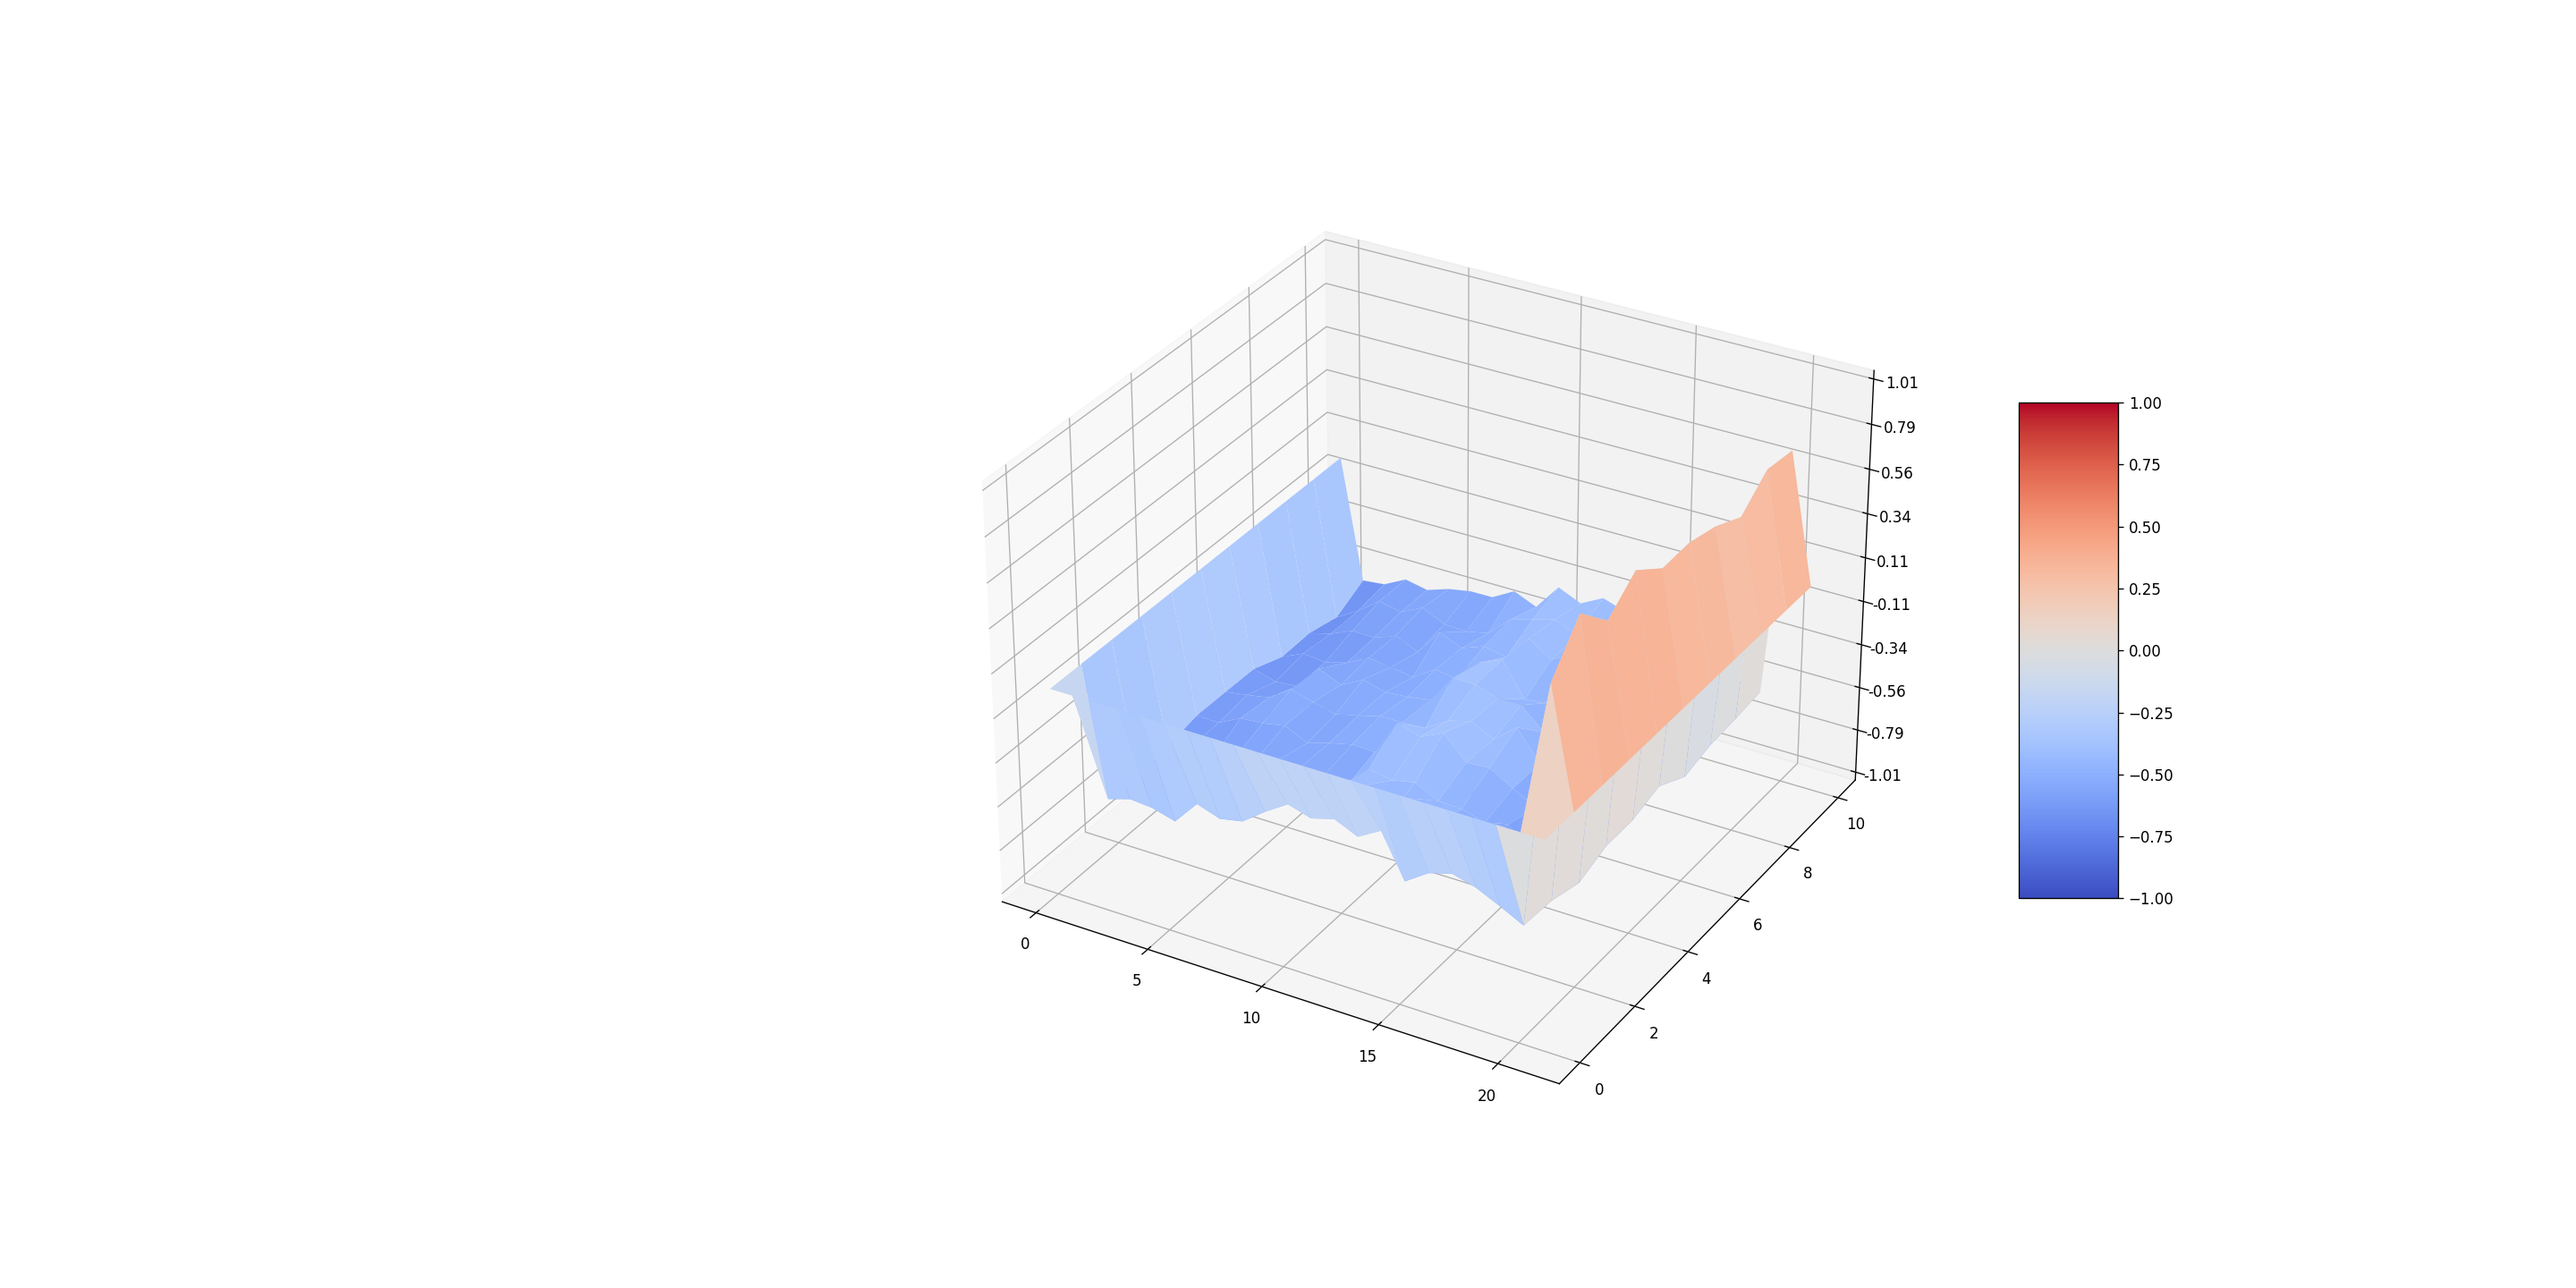

(11, 22) (11, 22)
(11, 22)


In [198]:
%matplotlib notebook
plot_surface(1,2,mc_prediction(e, simple_policy, episodes=10000),'dfdfd')    

## 3 TD Learning in Easy21 (15 marks)

* Implement $Sarsa(λ)$ in 21s.  
* Initialise the value function to zero.  
* Use the samestep-size and exploration schedules as in the previous section. 
* Run the algorithmwith parameter values $\lambda \in \{ 0,0.1,0.2 , \ldots , 1 \}$.  
* Stop each run after 1000 episodes and report the mean-squared error $\sum _ { s , a } ( Q ( s , a ) - Q ^ { * } ( s , a ) ) ^ { 2 }$ over all states $s$ and  actions $a$,  comparing  the  true  values $Q^∗(s,a)$  computed  in  the  previous section with the estimated values $Q(s,a)$ computed by Sarsa.  
* Plot the mean-squared error against $\lambda$.  
* For $\lambda = 0$ and $\lambda = 1$ only, plot the learning curve ofmean-squared error against episode number.

## 4 Linear Function Approximation in Easy21 (15 marks)

We now consider a simple value function approximator using coarse coding.  
* Use a binary feature vector $\varphi(s,a)$ with 3∗6∗2 = 36 features.  
* Each binary feature has a value of 1 iff (s,a) lies within the cuboid of state-space corresponding to that feature, and the action corresponding to that feature.  The cuboids have the following overlapping intervals:

$ dealer(s) ={[1,4],[4,7],[7,10]}$

$ player(s) ={[1,6],[4,9],[7,12],[10,15],[13,18],[16,21]}$ 

$a={hit,stick}$

where
    * dealer(s) is the value of the dealer’s first card (1–10)
    * sum(s) is the sum of the player’s cards (1–21)
    
* Repeat the $Sarsa(λ)$ experiment from the previous section, but using linear value function approximation 
$Q ( s , a ) = \phi ( s , a ) ^ { T } \theta$.  Use a constant exploration of $\epsilon = 0.05$ and a constant step-size of 0.01.  
* Plot the mean-squared error againstλ.  For $\lambda= 0$ and $\lambda = 1$ only,  plot the learning curve of mean-squared erroragainst episode number.

## 5  Discussion

Discuss the choice of algorithm used in the previous section.

•What are the pros and cons of bootstrapping in Easy21?

•Would  you  expect  bootstrapping  to  help  more  in blackjack or Easy21? Why?

•What are the pros and cons of function approximation in Easy21?

•How would you modify the function approximator suggested in this sectionto get better results in Easy21?
